In [297]:
import pandas as pd
from google.colab import drive
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Flatten, Reshape, Dropout, BatchNormalization, MaxPooling1D
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [298]:
drive.mount('/content/drive')

df = pd.read_excel('/content/drive/MyDrive/TCC/RMS INDEPENDENTES.xlsx', sheet_name='JEITO 7')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [299]:
def modelo(X):
  modelo = Sequential([
      Conv1D(filters=8, kernel_size=8, input_shape=(X.shape[1], 1), activation='relu', padding='same'),
      Flatten(),
      Dense(128, activation='relu'),
      Dense(units=1, activation='relu')
  ])

  return modelo

#Carro A-HB

##Treino

In [300]:
df_A_HB = pd.DataFrame(columns=df.columns)

for indice, linha in df.iterrows():
    if linha['VEICULO'] == 'A-HB':
         df_A_HB = pd.concat([df_A_HB, pd.DataFrame([linha], columns=df.columns)], ignore_index=True)

In [301]:
print(df_A_HB)

           RMS       IRI    V      k     c      ms   mus     kus VEICULO    P  \
0     0.374902  1.722854   30  14000  1876  186.75  41.5  200000    A-HB  1.0   
1     0.312542  1.530687   30  14000  1876  186.75  41.5  200000    A-HB  NaN   
2     0.299262  1.559335   30  14000  1876  186.75  41.5  200000    A-HB  NaN   
3     0.326102  1.575025   30  14000  1876  186.75  41.5  200000    A-HB  NaN   
4     0.425370  1.690348   30  14000  1876  186.75  41.5  200000    A-HB  NaN   
...        ...       ...  ...    ...   ...     ...   ...     ...     ...  ...   
5395  1.517264  2.776620  120  14000  1876  186.75  41.5  200000    A-HB  NaN   
5396  1.576646  2.713946  120  14000  1876  186.75  41.5  200000    A-HB  NaN   
5397  2.111287  1.971269  120  14000  1876  186.75  41.5  200000    A-HB  NaN   
5398  1.838563  3.323964  120  14000  1876  186.75  41.5  200000    A-HB  NaN   
5399  1.387600  1.667053  120  14000  1876  186.75  41.5  200000    A-HB  NaN   

      Unnamed: 10     RESUM

In [302]:
df_A_HB_norm = df_A_HB.iloc[:, 1:8]
y_A_HB = df_A_HB.iloc[:, 0]

scaler = MinMaxScaler()

df_A_HB_norm.iloc[:, 0] = scaler.fit_transform(df_A_HB_norm.iloc[:, 0].values.reshape(-1, 1))
df_A_HB_norm.iloc[:, 1] = scaler.fit_transform(df_A_HB_norm.iloc[:, 1].values.reshape(-1, 1))

df_A_HB_norm.iloc[:, 2:8] = 0.869

<ipython-input-302-c68e0f18621a>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_A_HB_norm.iloc[:, 1] = scaler.fit_transform(df_A_HB_norm.iloc[:, 1].values.reshape(-1, 1))
<ipython-input-302-c68e0f18621a>:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_A_HB_norm.iloc[:, 2:8] = 0.869


In [303]:
print(df_A_HB_norm)

           IRI    V      k      c     ms    mus    kus
0     0.175070  0.0  0.869  0.869  0.869  0.869  0.869
1     0.147721  0.0  0.869  0.869  0.869  0.869  0.869
2     0.151798  0.0  0.869  0.869  0.869  0.869  0.869
3     0.154031  0.0  0.869  0.869  0.869  0.869  0.869
4     0.170444  0.0  0.869  0.869  0.869  0.869  0.869
...        ...  ...    ...    ...    ...    ...    ...
5395  0.325042  1.0  0.869  0.869  0.869  0.869  0.869
5396  0.316123  1.0  0.869  0.869  0.869  0.869  0.869
5397  0.210425  1.0  0.869  0.869  0.869  0.869  0.869
5398  0.402940  1.0  0.869  0.869  0.869  0.869  0.869
5399  0.167129  1.0  0.869  0.869  0.869  0.869  0.869

[5400 rows x 7 columns]


In [304]:
modelo_A_HB = modelo(df_A_HB_norm)

modelo_A_HB.compile(optimizer='adam', loss='mean_squared_error')

modelo_A_HB.fit(df_A_HB_norm, y_A_HB, epochs=60, batch_size=64, verbose=1)

y_pred_A_HB = modelo_A_HB.predict(df_A_HB_norm)

mse = mean_squared_error(y_A_HB, y_pred_A_HB)
r2 = r2_score(y_A_HB, y_pred_A_HB)

print(f'Mean Squared Error (MSE): {mse:.3f}')
print(f'R^2 Score: {r2:.3f}')

Epoch 1/60
85/85 [==============================] - 1s 2ms/step - loss: 0.2379
Epoch 2/60
85/85 [==============================] - 0s 2ms/step - loss: 0.0804
Epoch 3/60
85/85 [==============================] - 0s 2ms/step - loss: 0.0314
Epoch 4/60
85/85 [==============================] - 0s 2ms/step - loss: 0.0243
Epoch 5/60
85/85 [==============================] - 0s 2ms/step - loss: 0.0209
Epoch 6/60
85/85 [==============================] - 0s 2ms/step - loss: 0.0191
Epoch 7/60
85/85 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 8/60
85/85 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 9/60
85/85 [==============================] - 0s 2ms/step - loss: 0.0179
Epoch 10/60
85/85 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 11/60
85/85 [==============================] - 0s 2ms/step - loss: 0.0179
Epoch 12/60
85/85 [==============================] - 0s 2ms/step - loss: 0.0179
Epoch 13/60
85/85 [==============================

##Graficos

###Geral

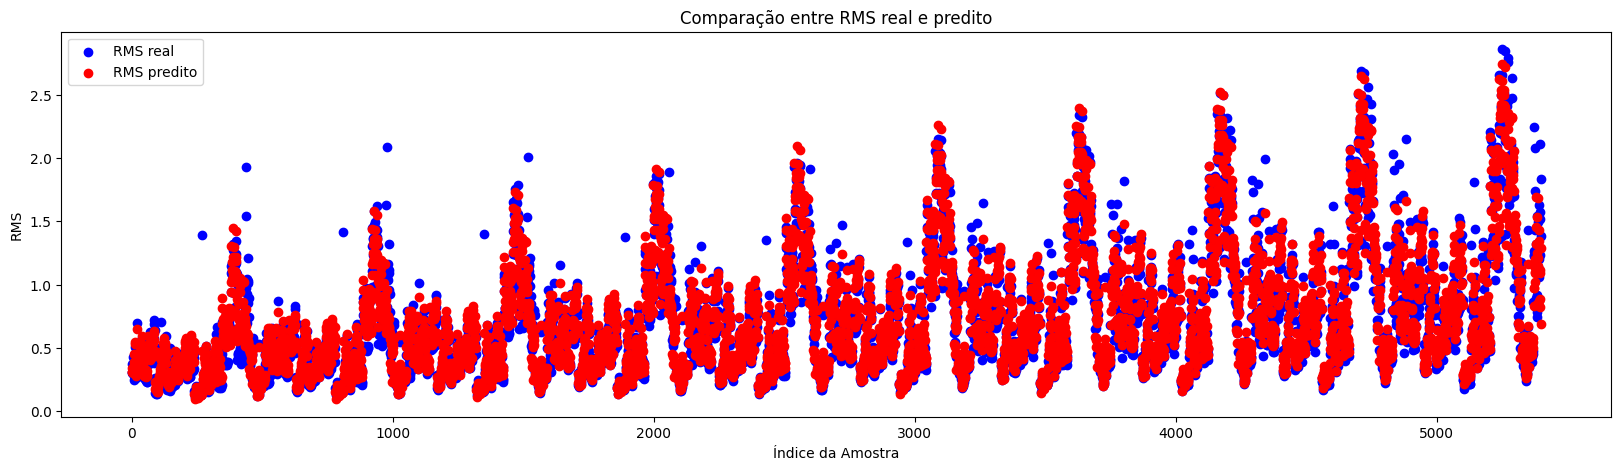

In [305]:
plt.figure(figsize=(20, 5))

plt.scatter(range(len(y_A_HB)), y_A_HB, label='RMS real', color='blue')
plt.scatter(range(len(y_pred_A_HB)), y_pred_A_HB, label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito')
plt.show()

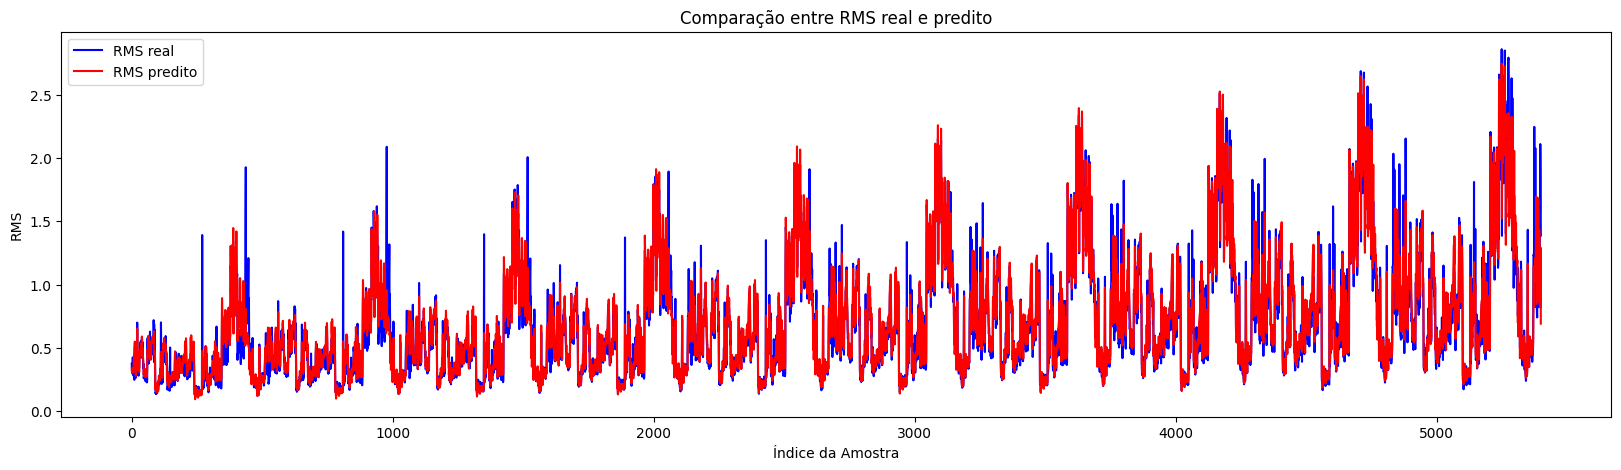

In [306]:
plt.figure(figsize=(20, 5))

plt.plot(range(len(y_A_HB)), y_A_HB, label='RMS real', color='blue')
plt.plot(range(len(y_pred_A_HB)), y_pred_A_HB, label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito')
plt.show()

#### K -5%

In [307]:
X_A_HB_k_menos_5 = df_A_HB_norm

In [308]:
X_A_HB_k_menos_5['k'] = 0.826

In [309]:
print(X_A_HB_k_menos_5)

           IRI    V      k      c     ms    mus    kus
0     0.175070  0.0  0.826  0.869  0.869  0.869  0.869
1     0.147721  0.0  0.826  0.869  0.869  0.869  0.869
2     0.151798  0.0  0.826  0.869  0.869  0.869  0.869
3     0.154031  0.0  0.826  0.869  0.869  0.869  0.869
4     0.170444  0.0  0.826  0.869  0.869  0.869  0.869
...        ...  ...    ...    ...    ...    ...    ...
5395  0.325042  1.0  0.826  0.869  0.869  0.869  0.869
5396  0.316123  1.0  0.826  0.869  0.869  0.869  0.869
5397  0.210425  1.0  0.826  0.869  0.869  0.869  0.869
5398  0.402940  1.0  0.826  0.869  0.869  0.869  0.869
5399  0.167129  1.0  0.826  0.869  0.869  0.869  0.869

[5400 rows x 7 columns]


In [310]:
y_pred_A_HB_k_menos_5 = modelo_A_HB.predict(X_A_HB_k_menos_5)

mse_A_HB_k_menos_5 = mean_squared_error(y_A_HB, y_pred_A_HB_k_menos_5)
r2_A_HB_k_menos_5 = r2_score(y_A_HB, y_pred_A_HB_k_menos_5)

print(f'Mean Squared Error (MSE): {mse_A_HB_k_menos_5:.3f}')
print(f'R^2 Score: {r2_A_HB_k_menos_5:.3f}')

169/169 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 0.017
R^2 Score: 0.922


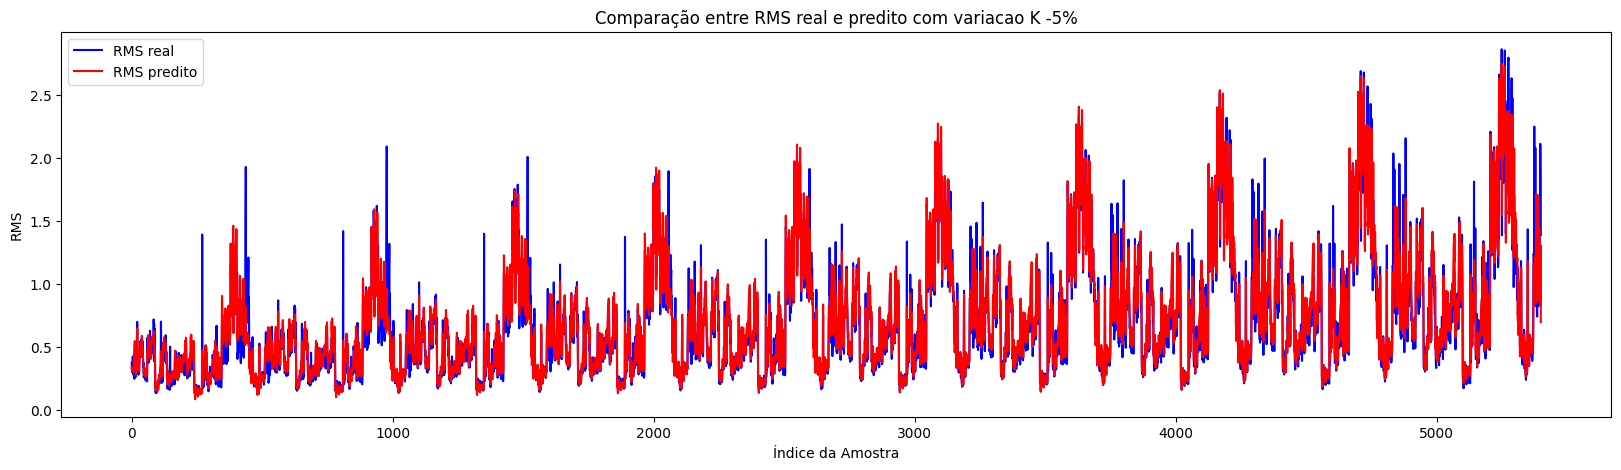

In [311]:
plt.figure(figsize=(20, 5))

plt.plot(range(len(y_A_HB)), y_A_HB, label='RMS real', color='blue')
plt.plot(range(len(y_pred_A_HB_k_menos_5)), y_pred_A_HB_k_menos_5, label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -5%')
plt.show()

##### K -5% 30 km/h

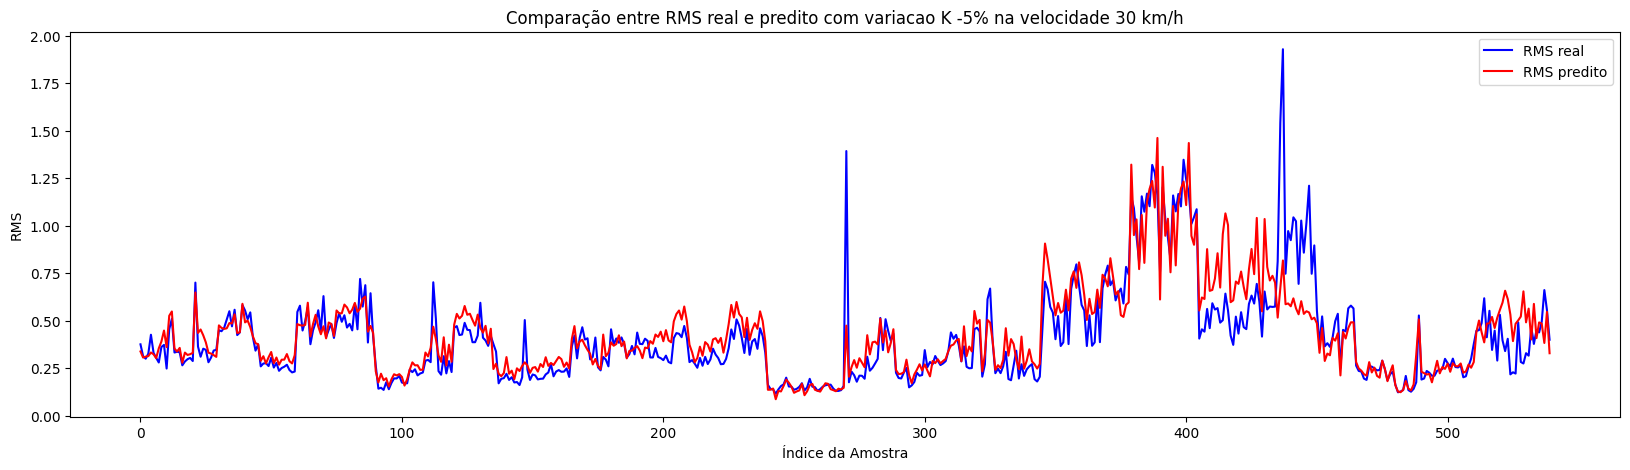

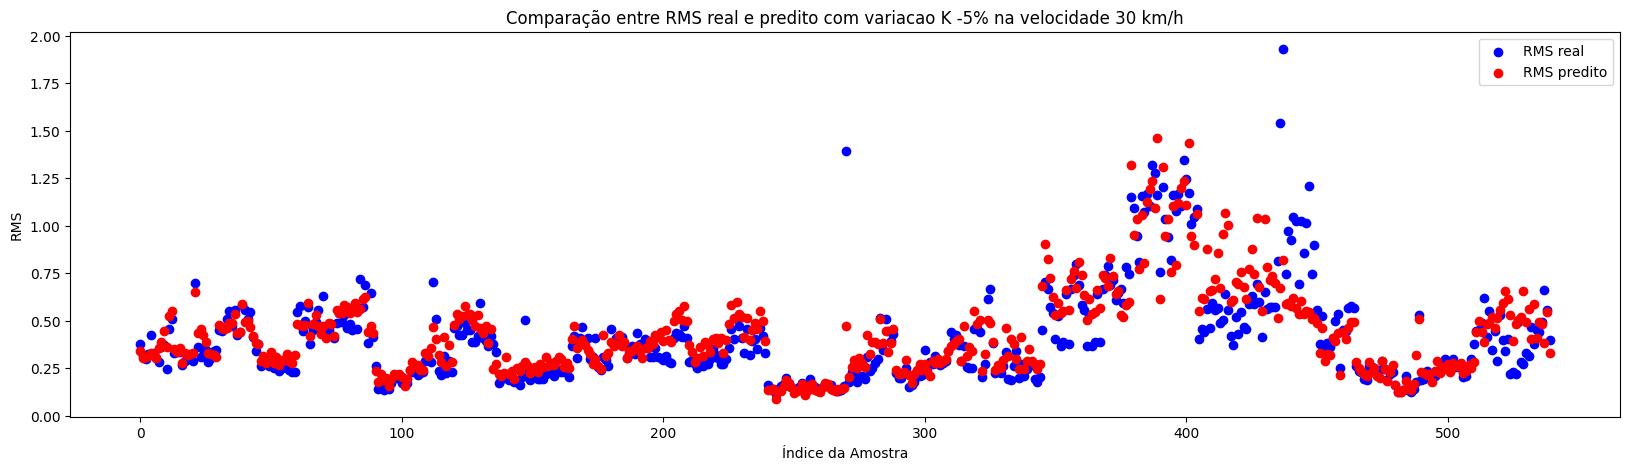

In [312]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[:540], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_5[:540], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -5% na velocidade 30 km/h')
plt.show()

plt.figure(figsize=(20, 5))

plt.scatter(range(540), y_A_HB[:540], label='RMS real', color='blue')
plt.scatter(range(540), y_pred_A_HB_k_menos_5[:540], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -5% na velocidade 30 km/h')
plt.show()

##### K -5% 40 km/h

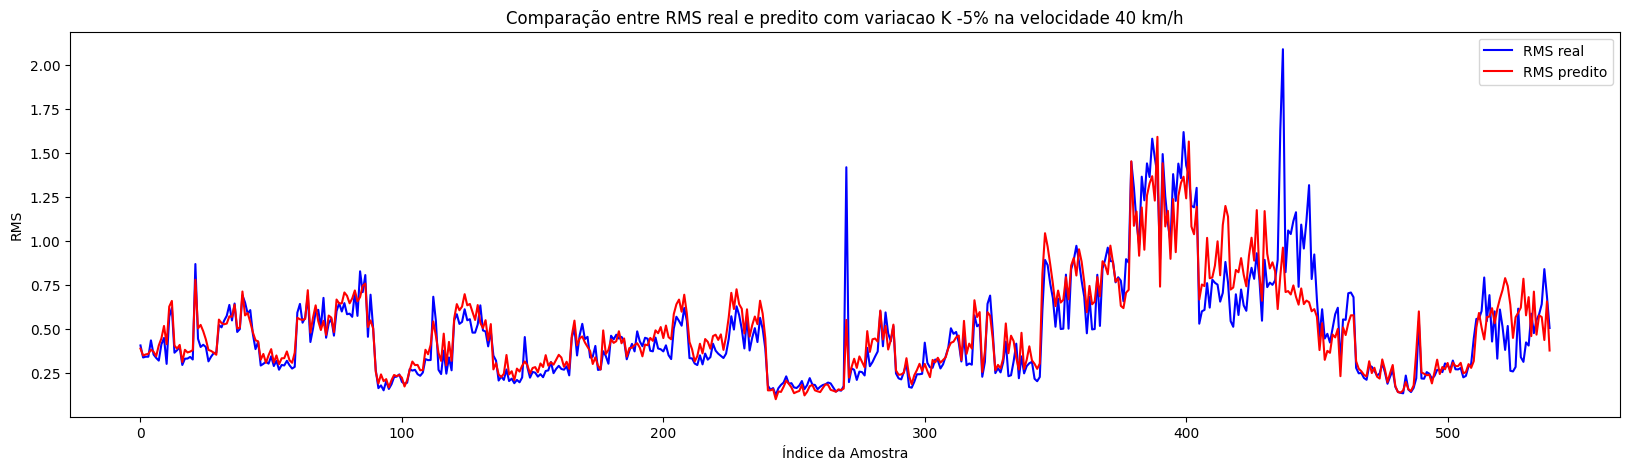

In [313]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[540:1080], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_5[540:1080], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -5% na velocidade 40 km/h')
plt.show()

##### K -5% 50 km/h

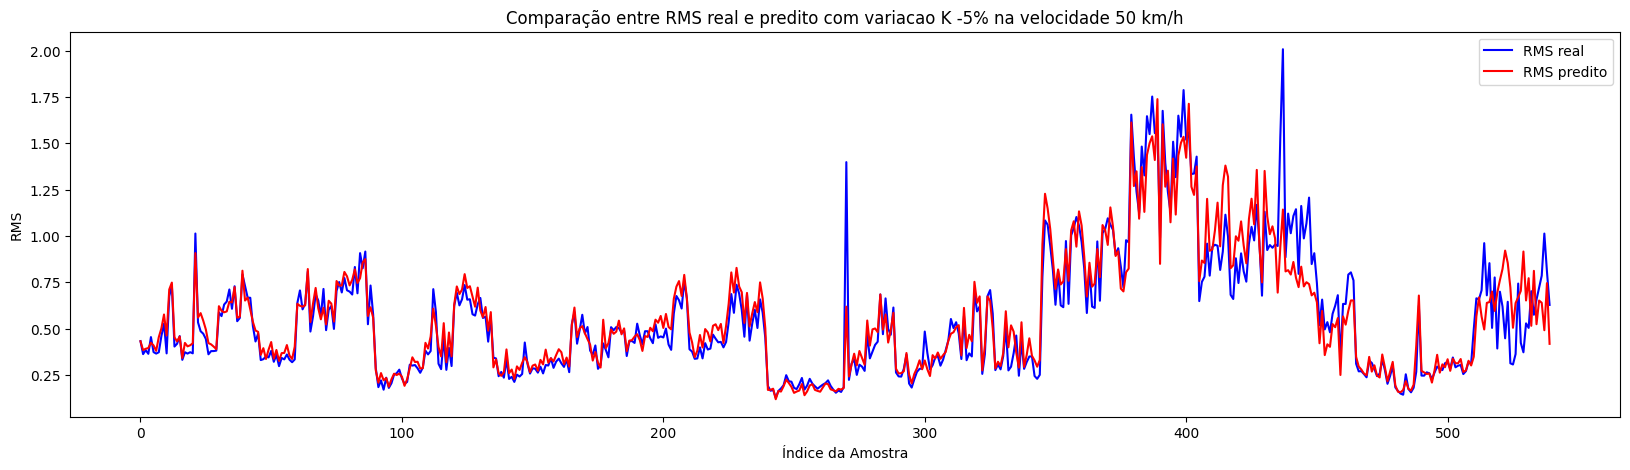

In [314]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[1080:1620], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_5[1080:1620], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -5% na velocidade 50 km/h')
plt.show()

##### K -5% 60 km/h

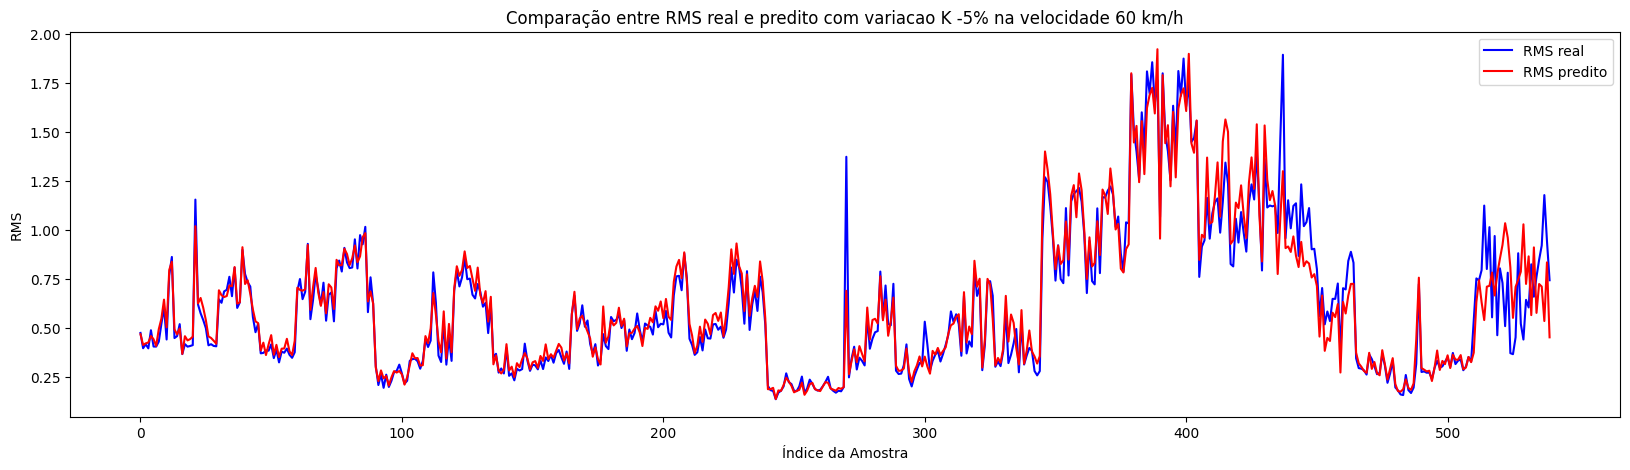

In [315]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[1620:2160], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_5[1620:2160], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -5% na velocidade 60 km/h')
plt.show()

##### K -5% 70 km/h

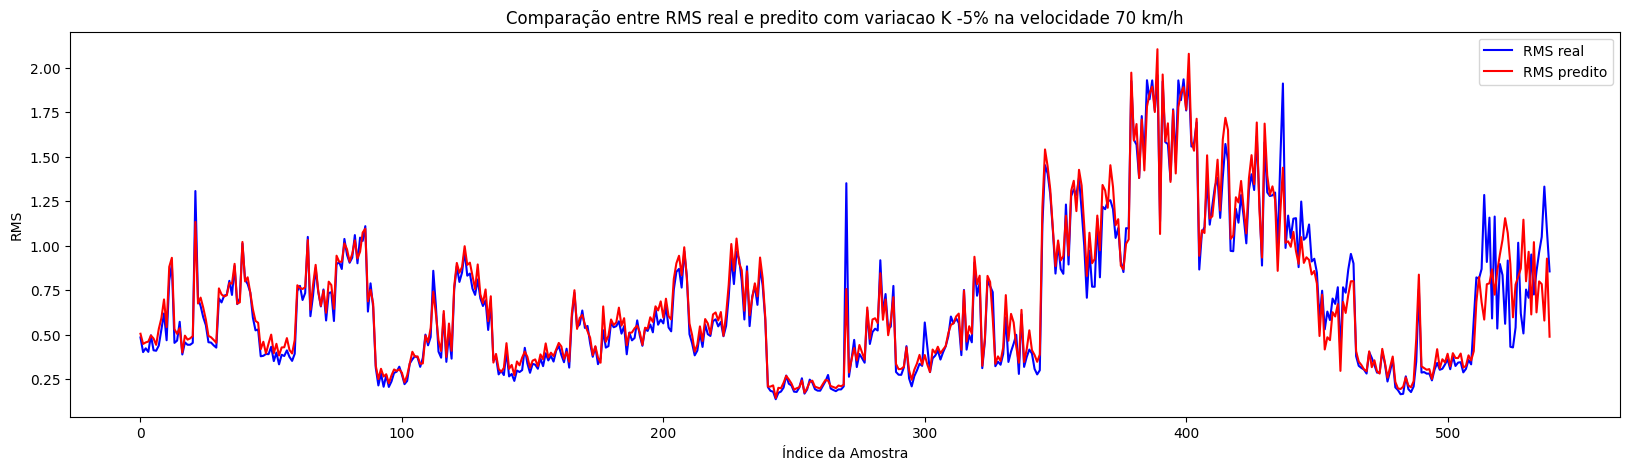

In [316]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[2160:2700], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_5[2160:2700], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -5% na velocidade 70 km/h')
plt.show()

##### K -5% 80 km/h

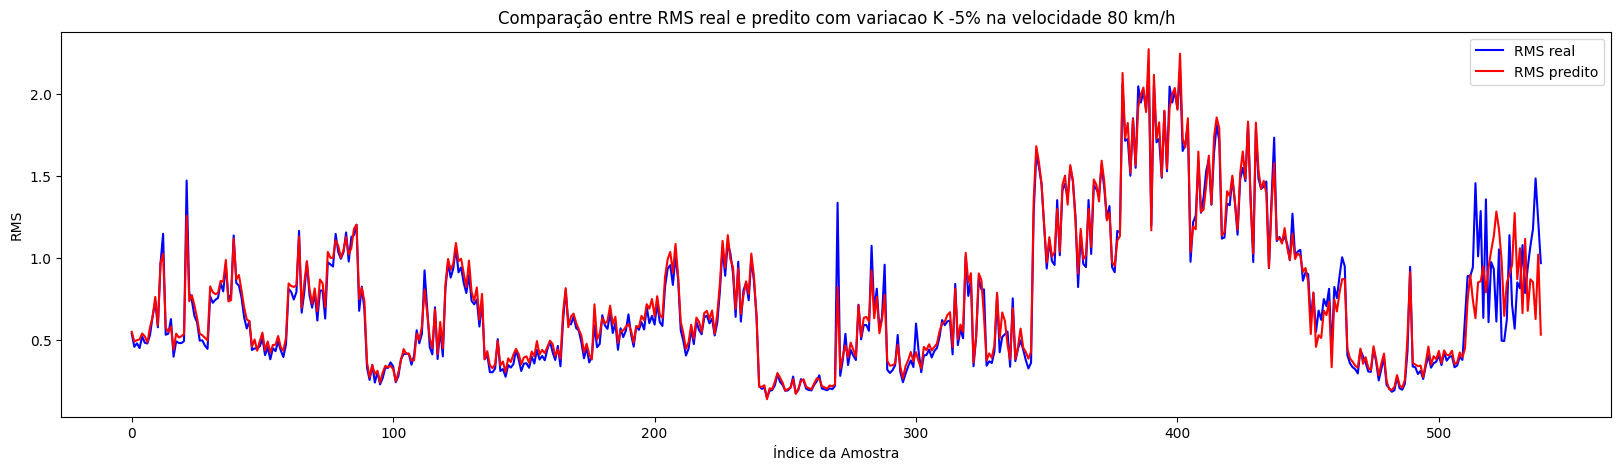

In [317]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[2700:3240], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_5[2700:3240], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -5% na velocidade 80 km/h')
plt.show()

##### K -5% 90 km/h

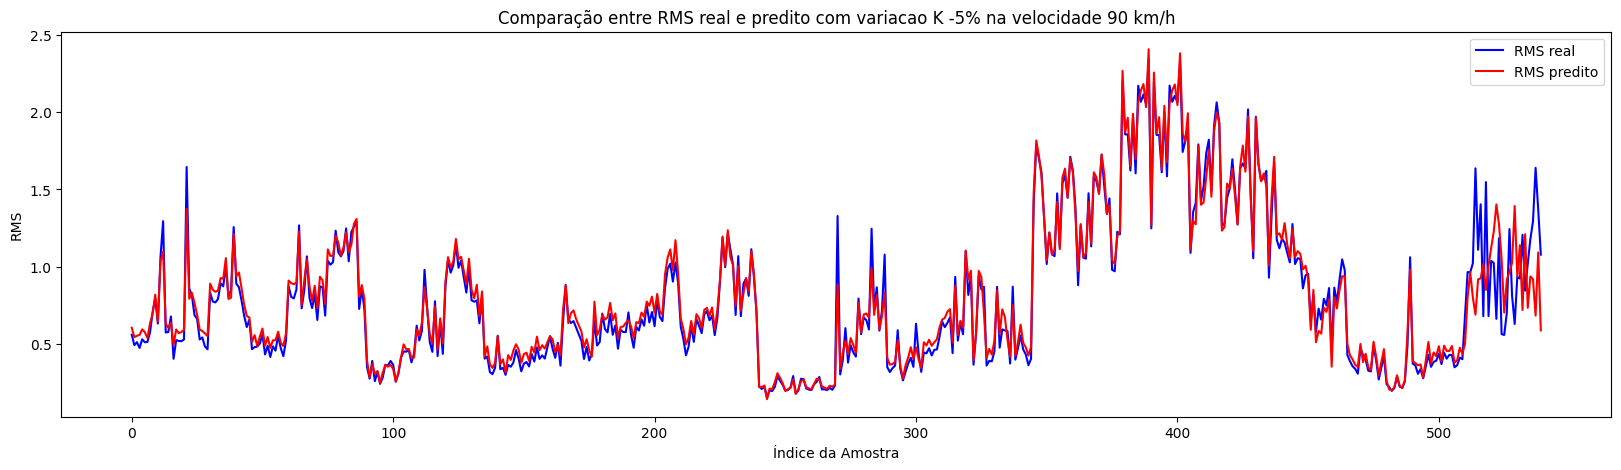

In [318]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[3240:3780], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_5[3240:3780], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -5% na velocidade 90 km/h')
plt.show()

##### K -5% 100 km/h

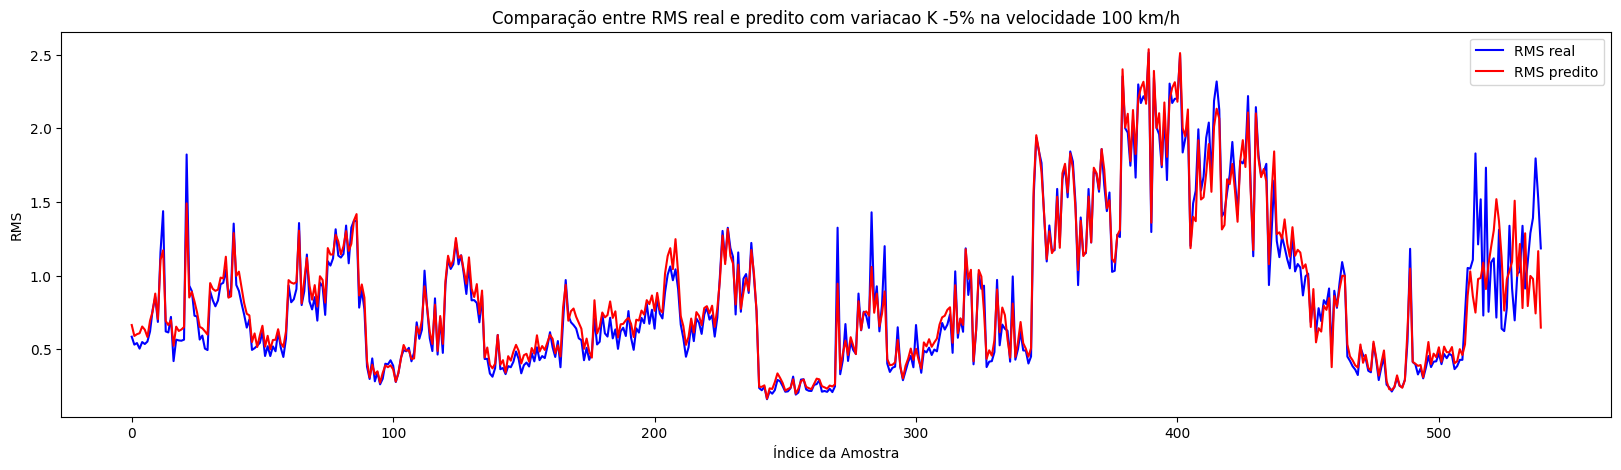

In [319]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[3780:4320], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_5[3780:4320], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -5% na velocidade 100 km/h')
plt.show()

##### K -5% 110 km/h

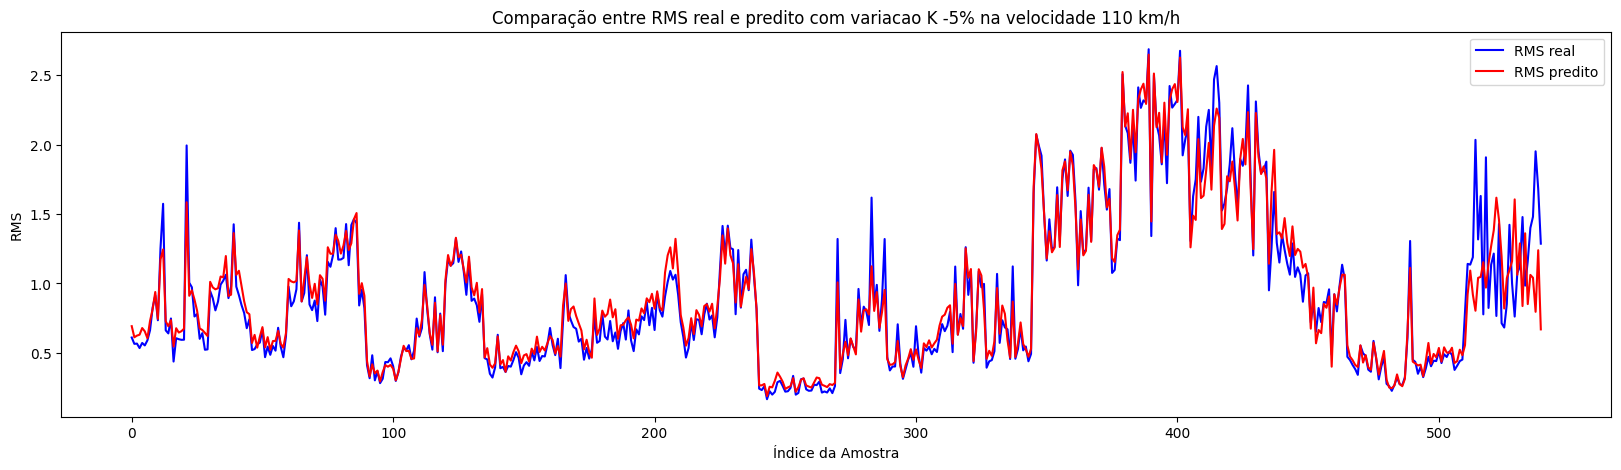

In [320]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[4320:4860], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_5[4320:4860], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -5% na velocidade 110 km/h')
plt.show()

##### K -5% 120 km/h

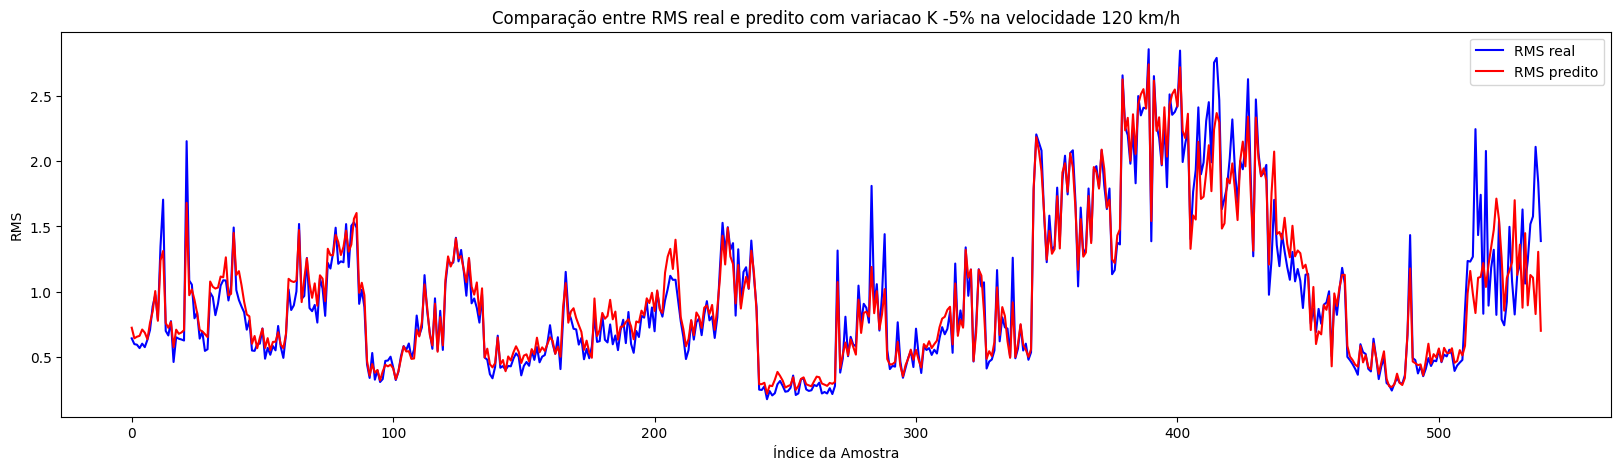

In [321]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[4860:5400], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_5[4860:5400], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -5% na velocidade 120 km/h')
plt.show()

#### K -10%

In [322]:
X_A_HB_k_menos_10 = df_A_HB_norm

In [323]:
X_A_HB_k_menos_10['k'] = 0.782

In [324]:
print(X_A_HB_k_menos_10)

           IRI    V      k      c     ms    mus    kus
0     0.175070  0.0  0.782  0.869  0.869  0.869  0.869
1     0.147721  0.0  0.782  0.869  0.869  0.869  0.869
2     0.151798  0.0  0.782  0.869  0.869  0.869  0.869
3     0.154031  0.0  0.782  0.869  0.869  0.869  0.869
4     0.170444  0.0  0.782  0.869  0.869  0.869  0.869
...        ...  ...    ...    ...    ...    ...    ...
5395  0.325042  1.0  0.782  0.869  0.869  0.869  0.869
5396  0.316123  1.0  0.782  0.869  0.869  0.869  0.869
5397  0.210425  1.0  0.782  0.869  0.869  0.869  0.869
5398  0.402940  1.0  0.782  0.869  0.869  0.869  0.869
5399  0.167129  1.0  0.782  0.869  0.869  0.869  0.869

[5400 rows x 7 columns]


In [325]:
y_pred_A_HB_k_menos_10 = modelo_A_HB.predict(X_A_HB_k_menos_10)

mse_A_HB_k_menos_10 = mean_squared_error(y_A_HB, y_pred_A_HB_k_menos_10)
r2_A_HB_k_menos_10 = r2_score(y_A_HB, y_pred_A_HB_k_menos_10)

print(f'Mean Squared Error (MSE): {mse_A_HB_k_menos_10:.3f}')
print(f'R^2 Score: {r2_A_HB_k_menos_10:.3f}')

169/169 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 0.017
R^2 Score: 0.921


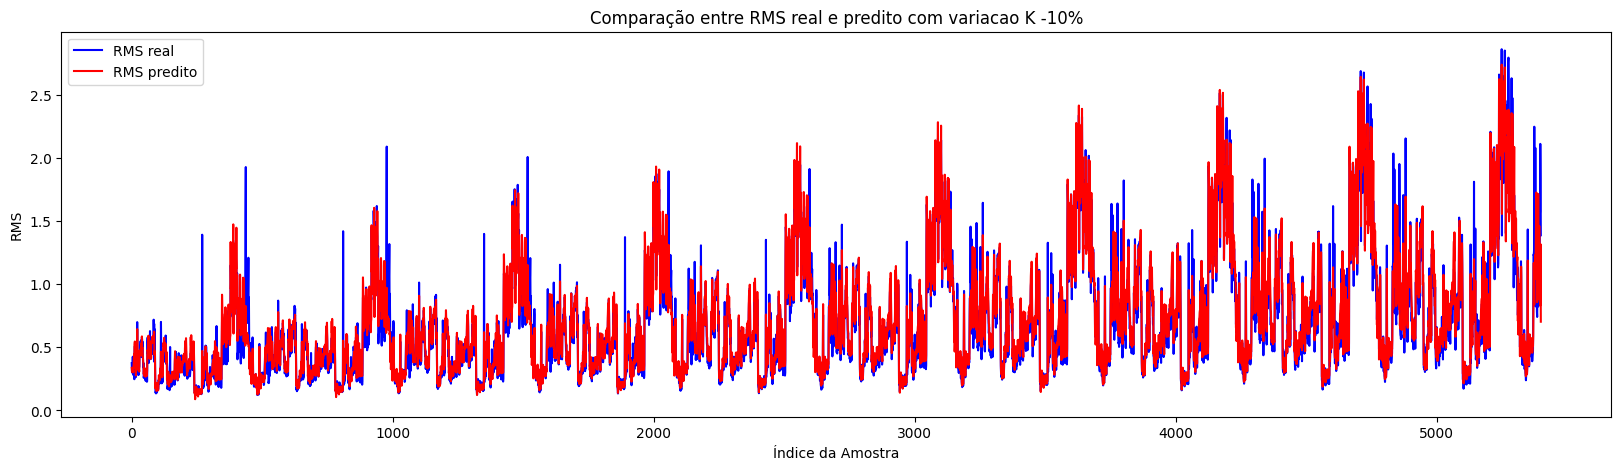

In [326]:
plt.figure(figsize=(20, 5))

plt.plot(range(len(y_A_HB)), y_A_HB, label='RMS real', color='blue')
plt.plot(range(len(y_pred_A_HB_k_menos_10)), y_pred_A_HB_k_menos_10, label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -10%')
plt.show()

##### K -10% 30 km/h

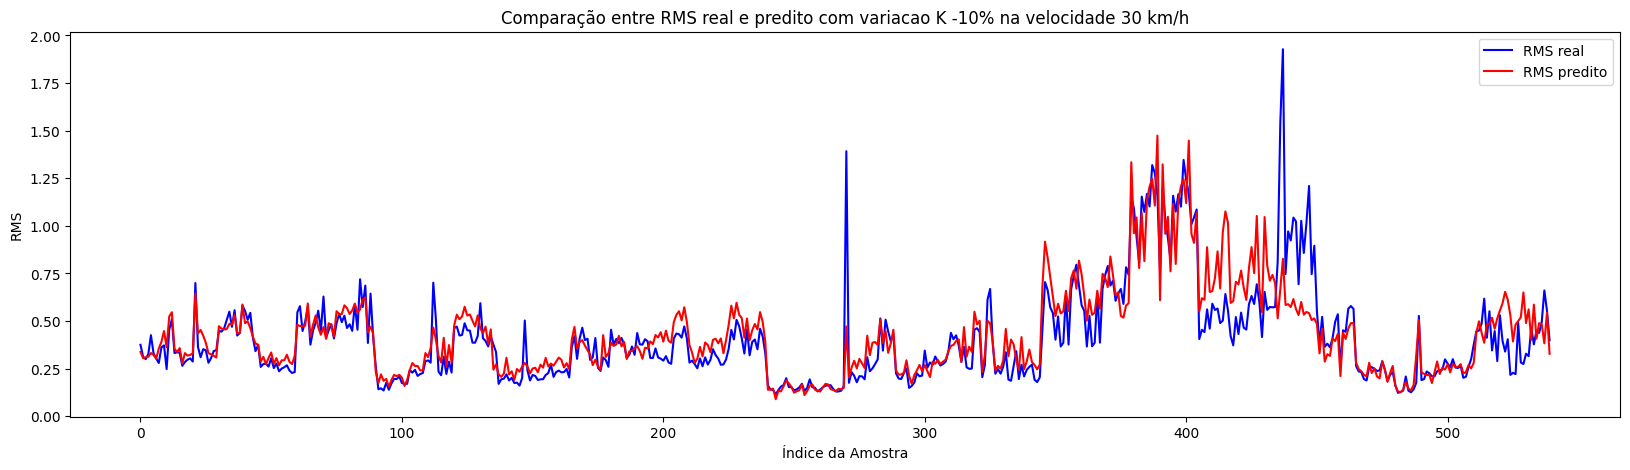

In [327]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[:540], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_10[:540], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -10% na velocidade 30 km/h')
plt.show()

#####K -10% 40 km/h

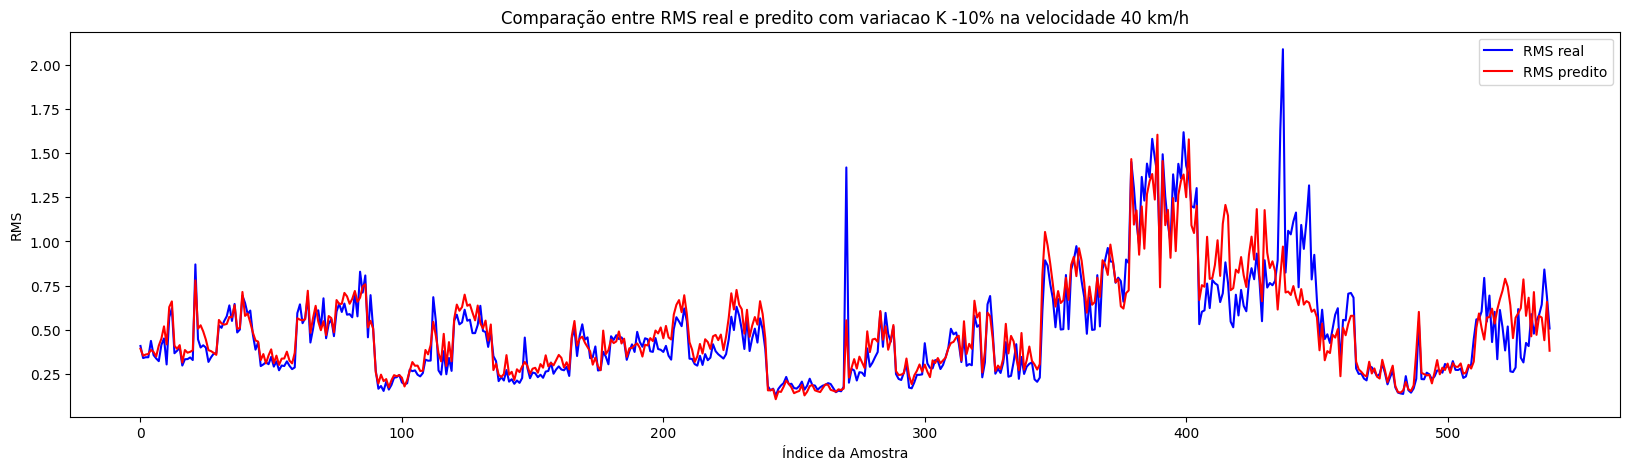

In [328]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[540:1080], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_10[540:1080], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -10% na velocidade 40 km/h')
plt.show()

#####K -10% 50 km/h

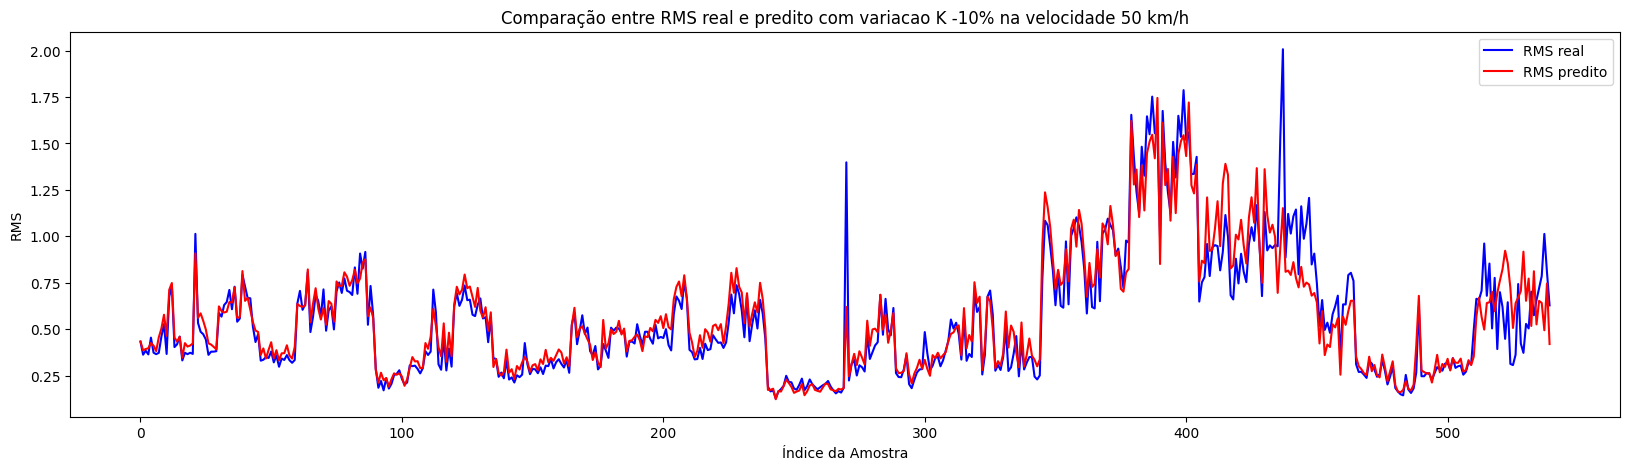

In [329]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[1080:1620], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_10[1080:1620], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -10% na velocidade 50 km/h')
plt.show()

#####K -10% 60 km/h

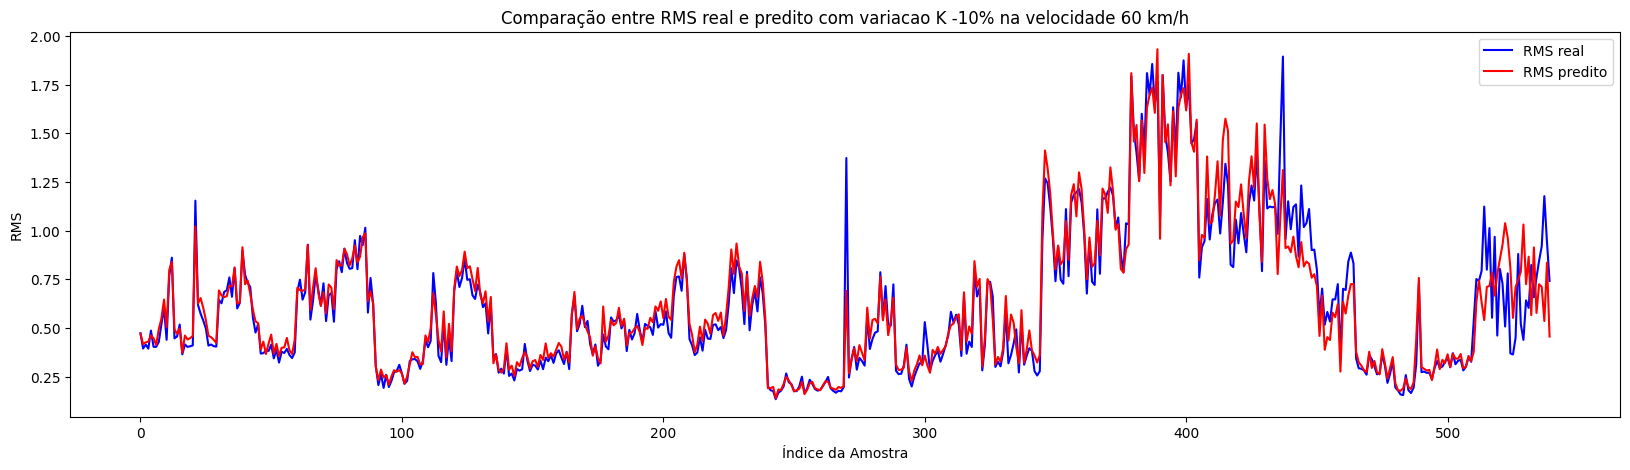

In [330]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[1620:2160], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_10[1620:2160], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -10% na velocidade 60 km/h')
plt.show()

#####K -10% 70 km/h

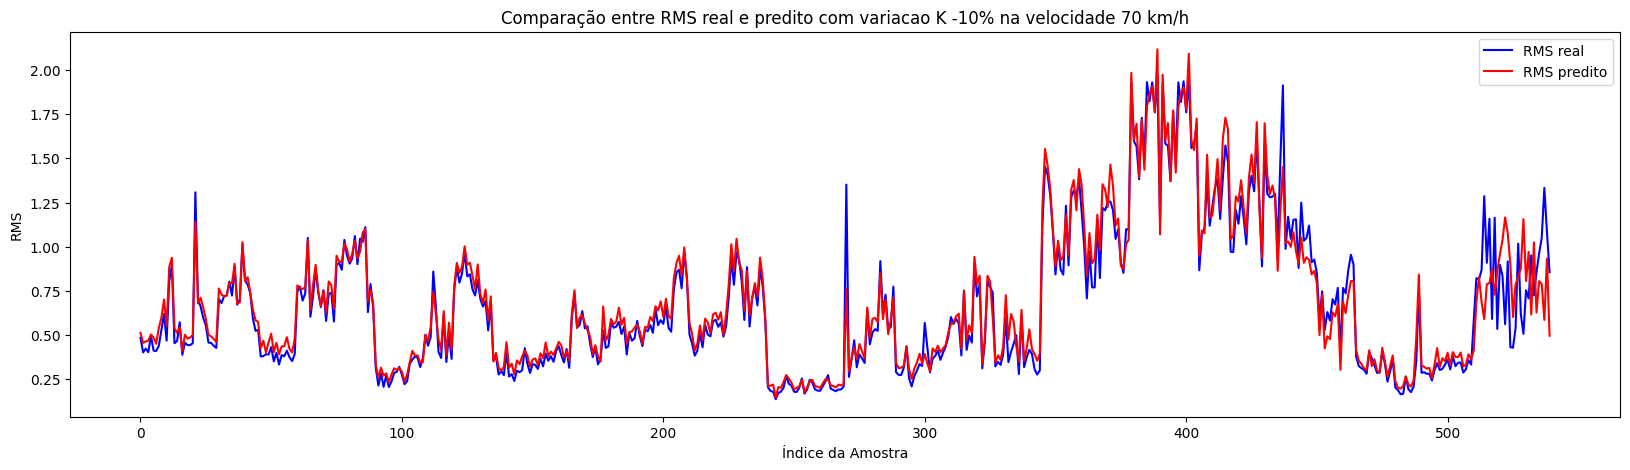

In [331]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[2160:2700], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_10[2160:2700], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -10% na velocidade 70 km/h')
plt.show()

#####K -10% 80 km/h

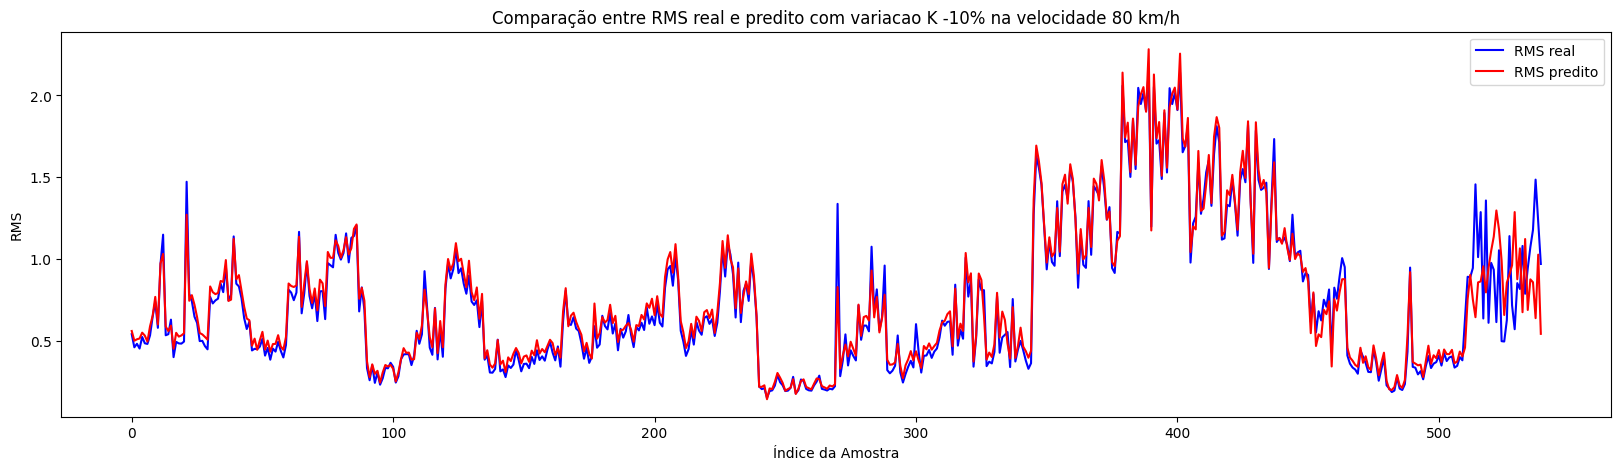

In [332]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[2700:3240], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_10[2700:3240], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -10% na velocidade 80 km/h')
plt.show()

#####K -10% 90 km/h

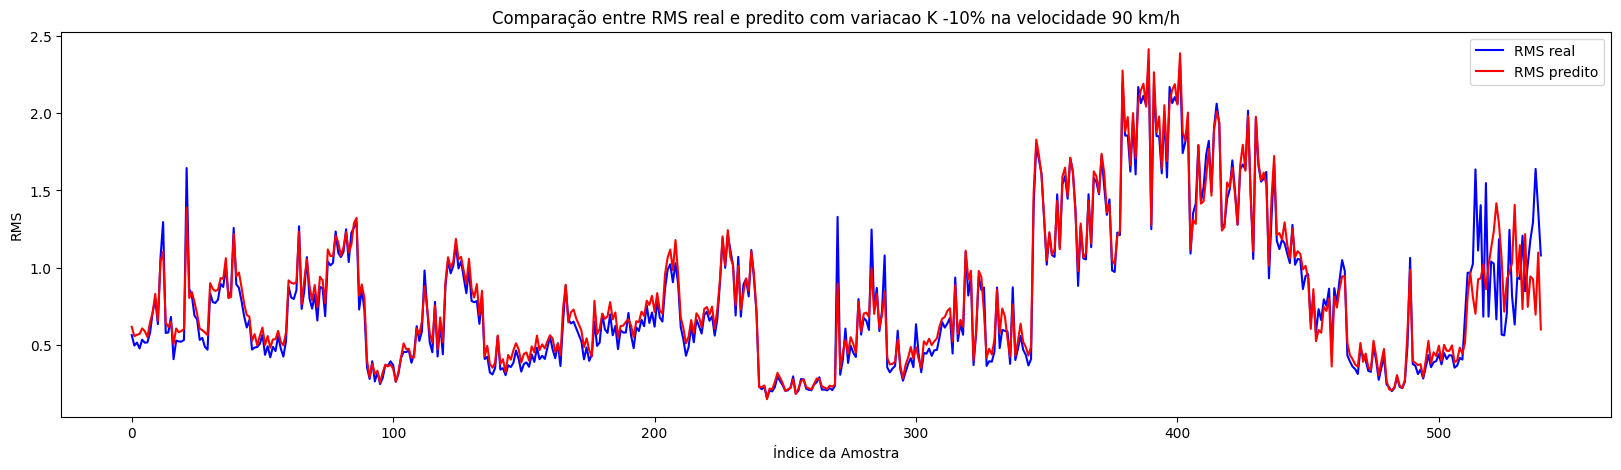

In [333]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[3240:3780], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_10[3240:3780], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -10% na velocidade 90 km/h')
plt.show()

#####K -10% 100 km/h

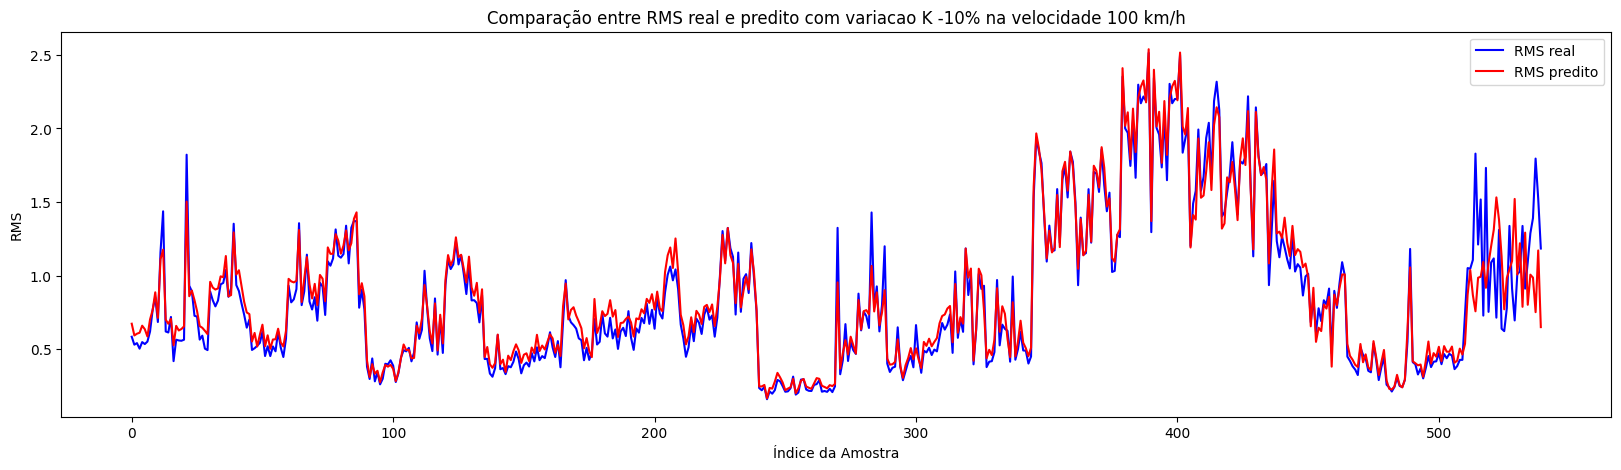

In [334]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[3780:4320], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_10[3780:4320], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -10% na velocidade 100 km/h')
plt.show()

#####K -10% 110 km/h

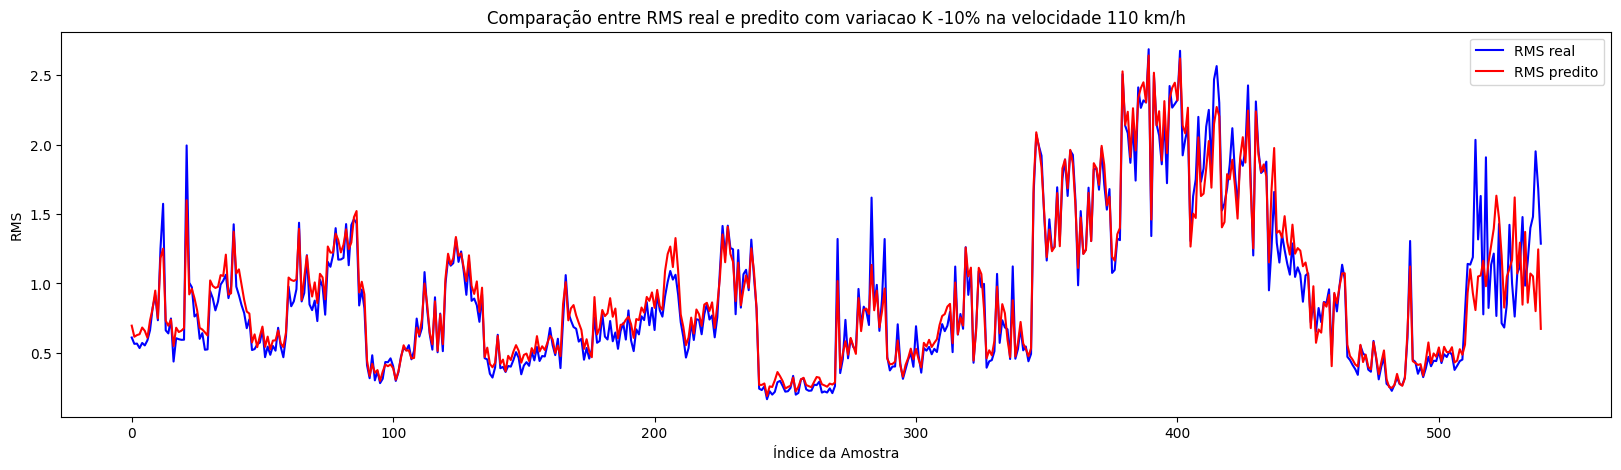

In [335]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[4320:4860], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_10[4320:4860], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -10% na velocidade 110 km/h')
plt.show()

#####K -10% 120 km/h

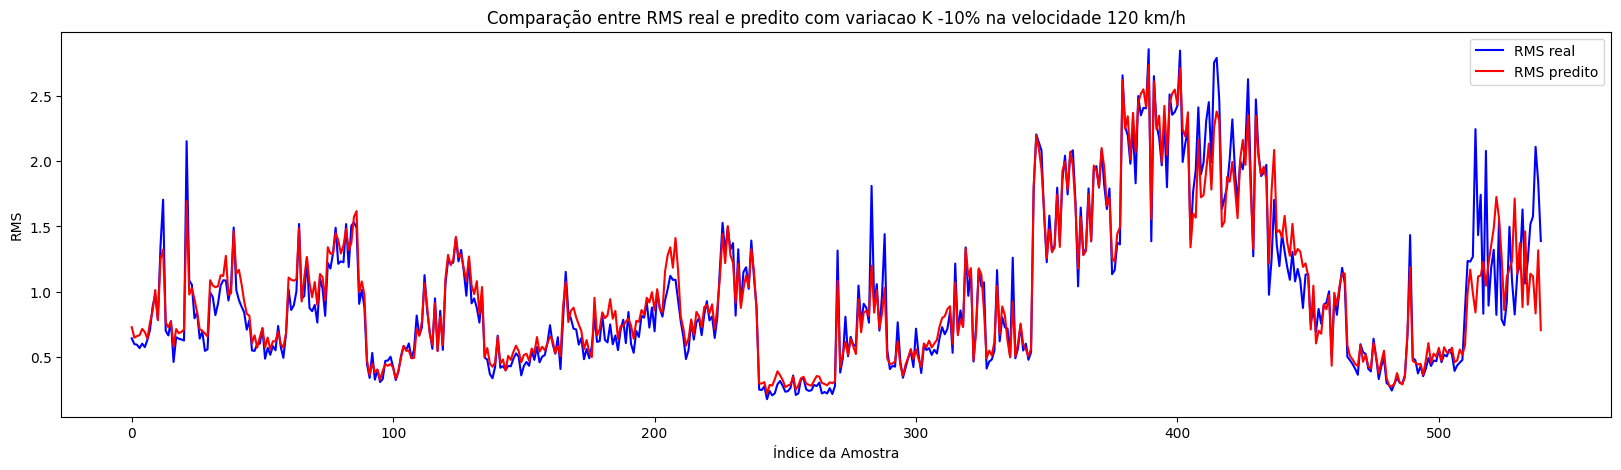

In [336]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[4860:5400], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_10[4860:5400], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -10% na velocidade 120 km/h')
plt.show()

#### K -15%

In [337]:
X_A_HB_k_menos_15 = df_A_HB_norm

In [338]:
X_A_HB_k_menos_15['k'] = 0.739

In [339]:
y_pred_A_HB_k_menos_15 = modelo_A_HB.predict(X_A_HB_k_menos_15)

mse_A_HB_k_menos_15 = mean_squared_error(y_A_HB, y_pred_A_HB_k_menos_15)
r2_A_HB_k_menos_15 = r2_score(y_A_HB, y_pred_A_HB_k_menos_15)

print(f'Mean Squared Error (MSE): {mse_A_HB_k_menos_15:.3f}')
print(f'R^2 Score: {r2_A_HB_k_menos_15:.3f}')

169/169 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 0.017
R^2 Score: 0.920


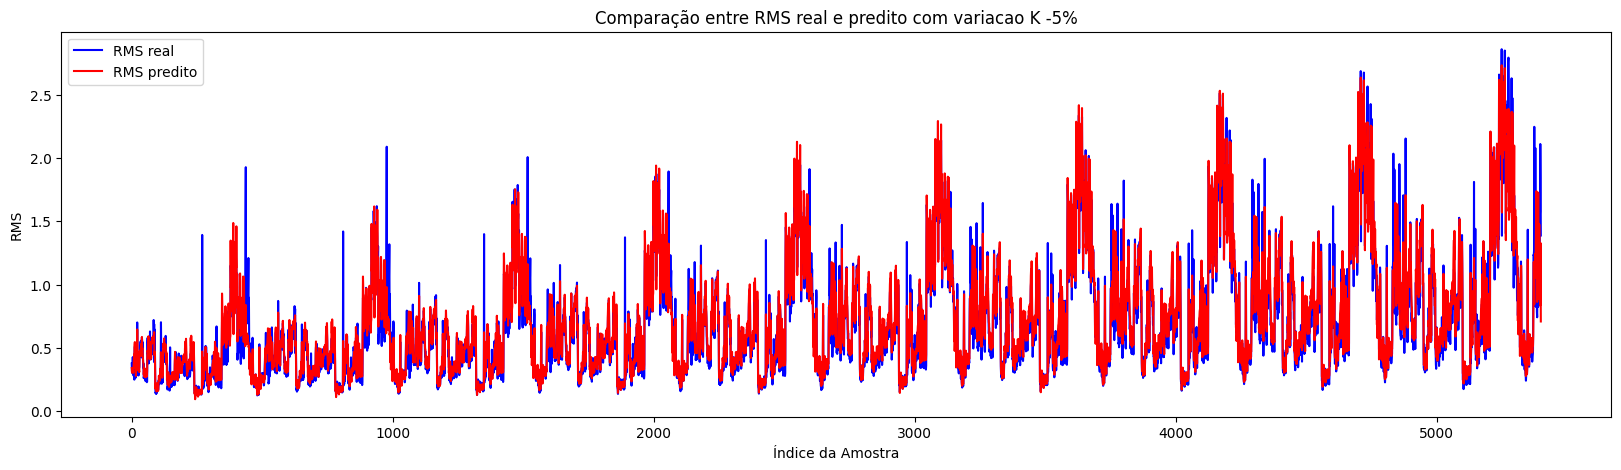

In [340]:
plt.figure(figsize=(20, 5))

plt.plot(range(len(y_A_HB)), y_A_HB, label='RMS real', color='blue')
plt.plot(range(len(y_pred_A_HB_k_menos_15)), y_pred_A_HB_k_menos_15, label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -5%')
plt.show()

##### K -15% 30 km/h

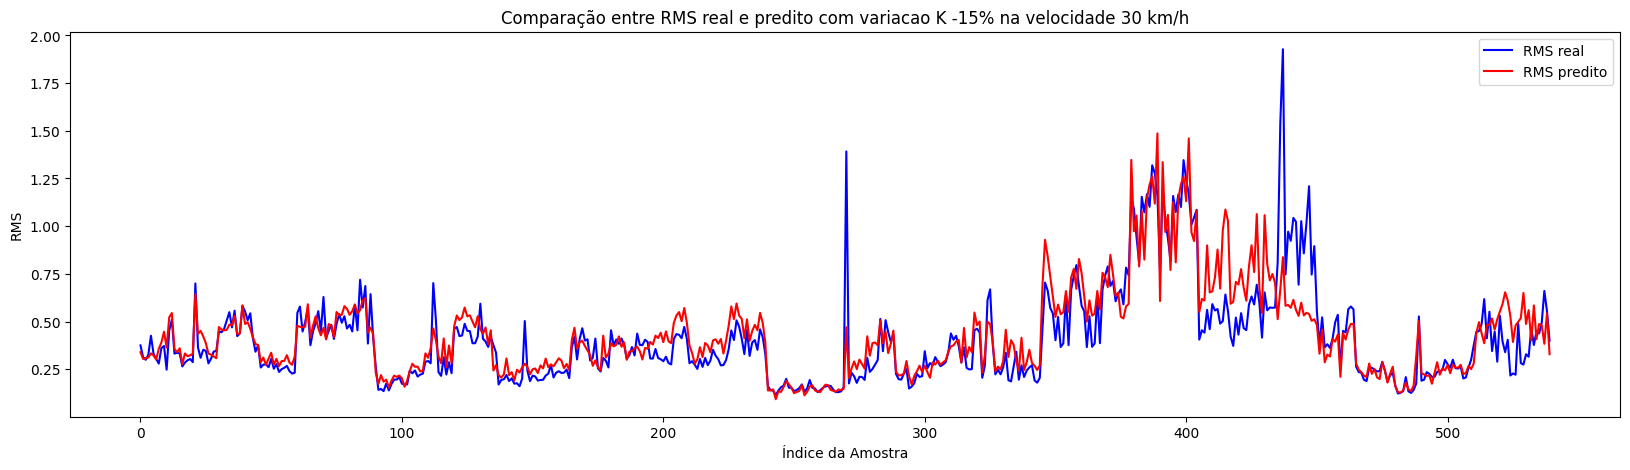

In [341]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[:540], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_15[:540], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 30 km/h')
plt.show()

##### K -15% 40 km/h

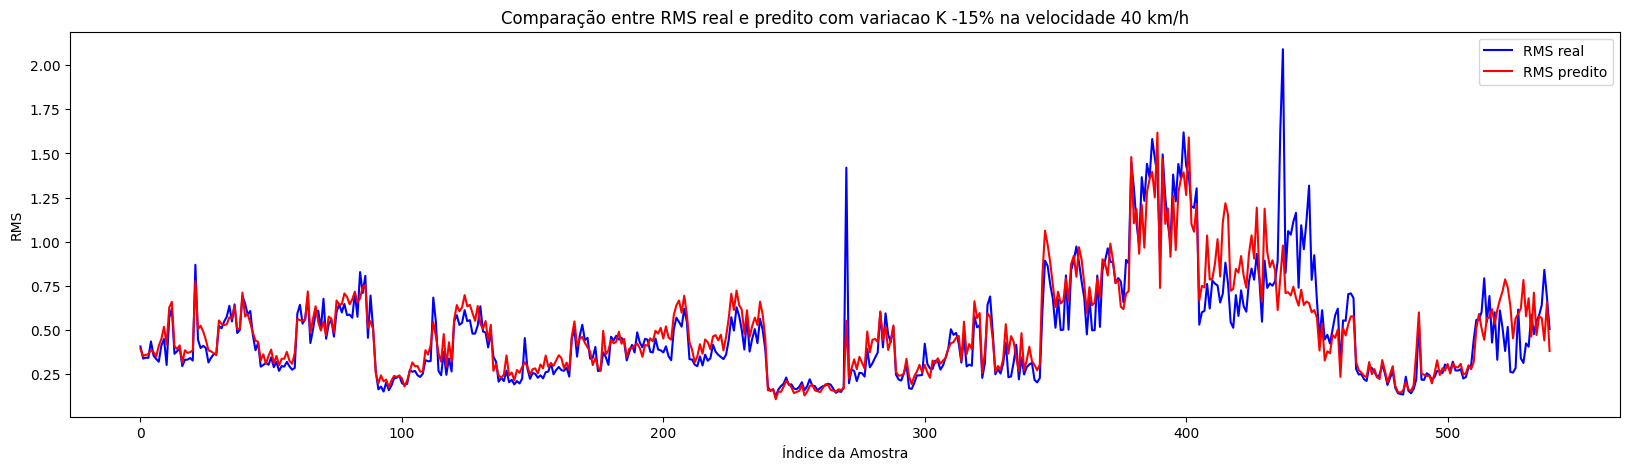

In [342]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[540:1080], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_15[540:1080], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 40 km/h')
plt.show()

##### K -15% 50 km/h

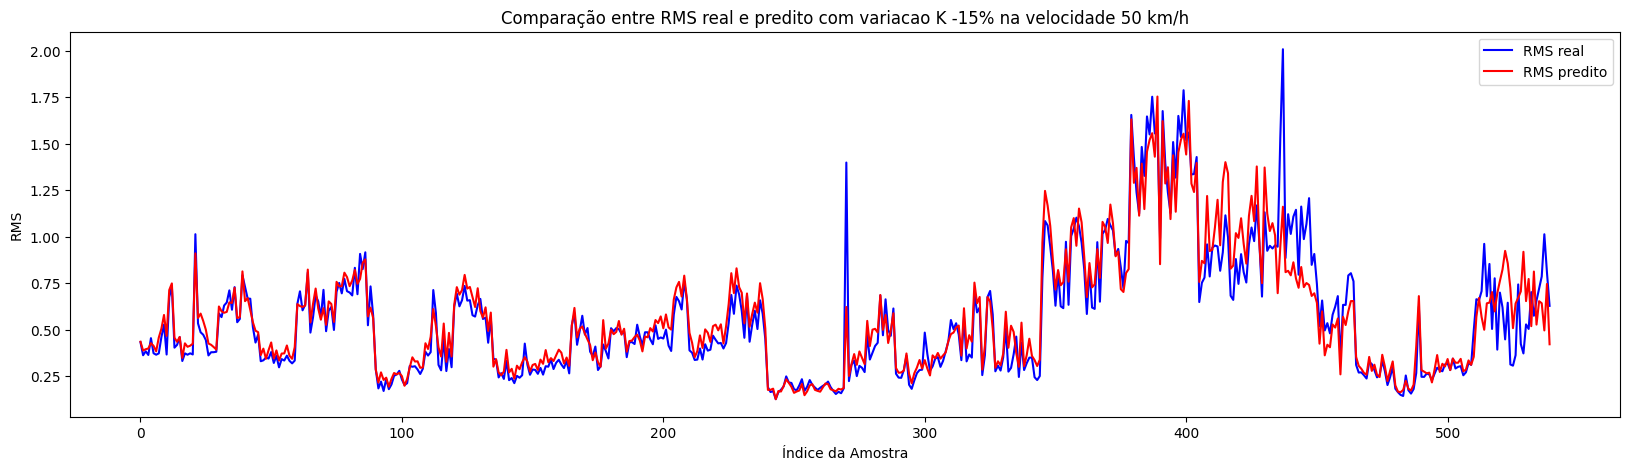

In [343]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[1080:1620], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_15[1080:1620], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 50 km/h')
plt.show()

##### K -15% 60 km/h

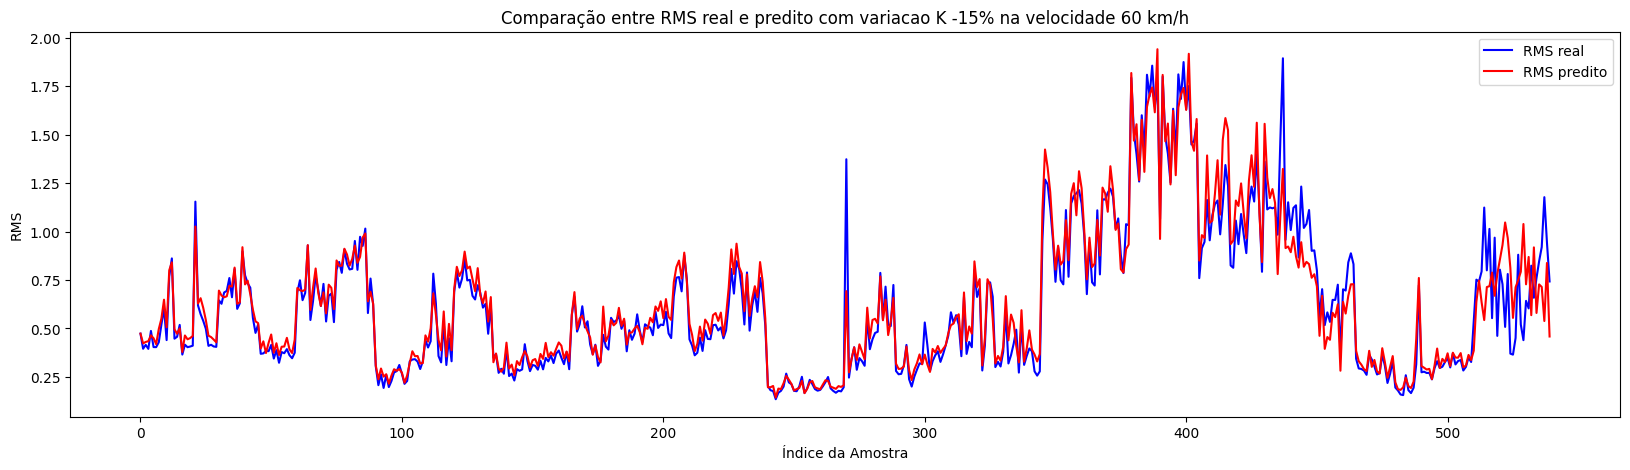

In [344]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[1620:2160], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_15[1620:2160], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 60 km/h')
plt.show()

##### K -15% 70 km/h

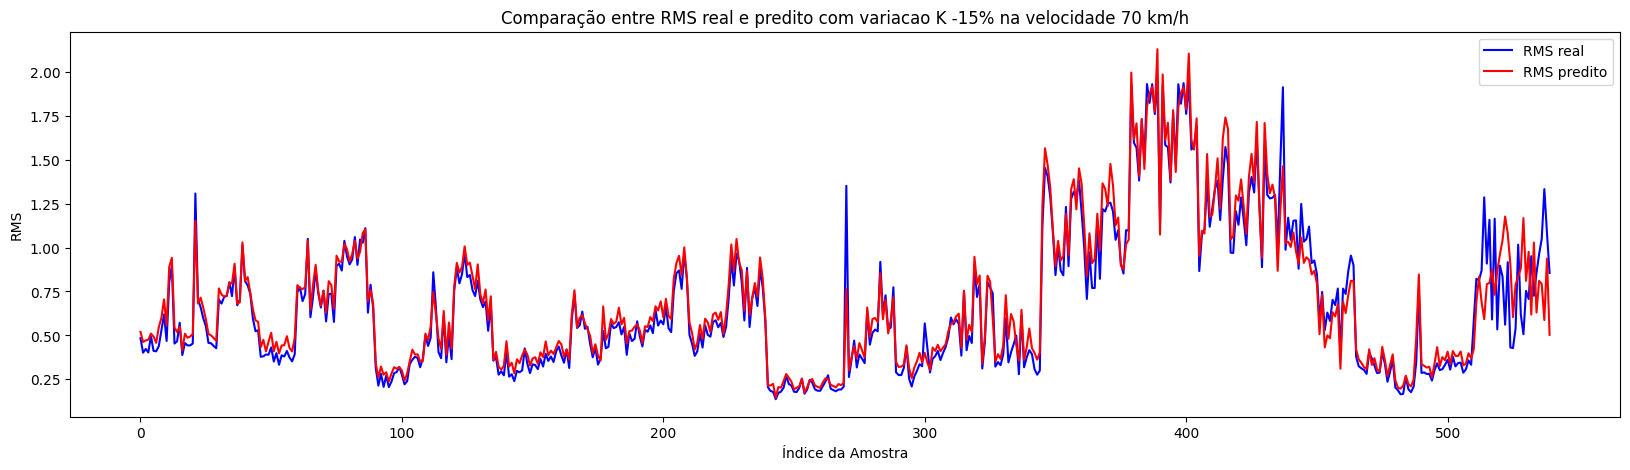

In [345]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[2160:2700], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_15[2160:2700], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 70 km/h')
plt.show()

##### K -15% 80 km/h

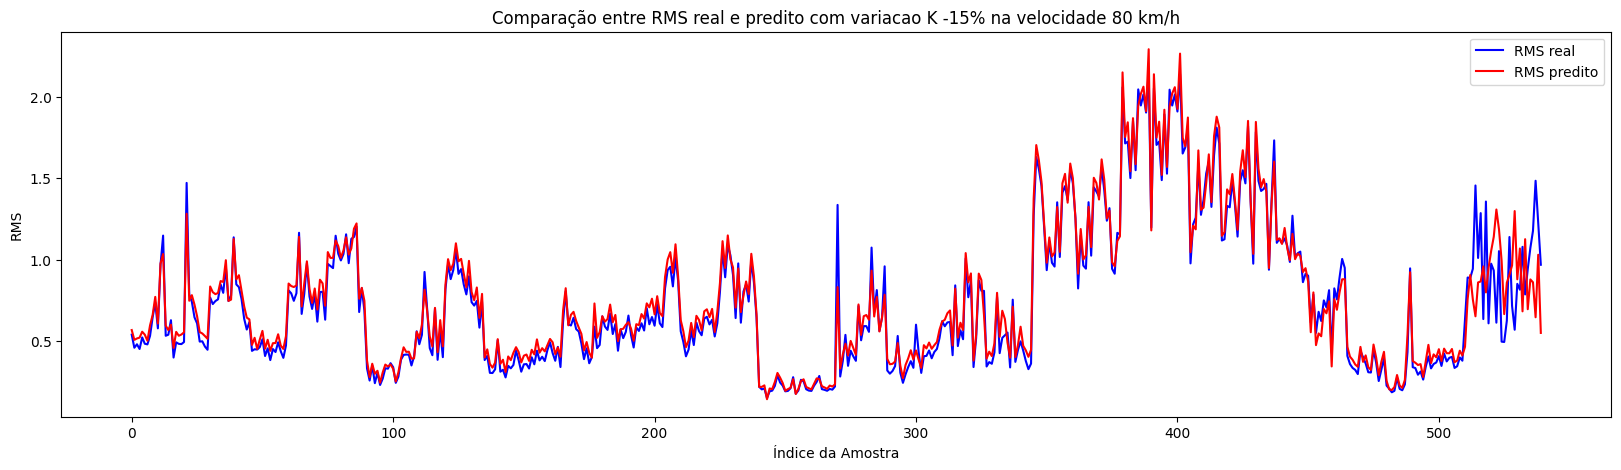

In [346]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[2700:3240], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_15[2700:3240], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 80 km/h')
plt.show()

##### K -15% 90 km/h

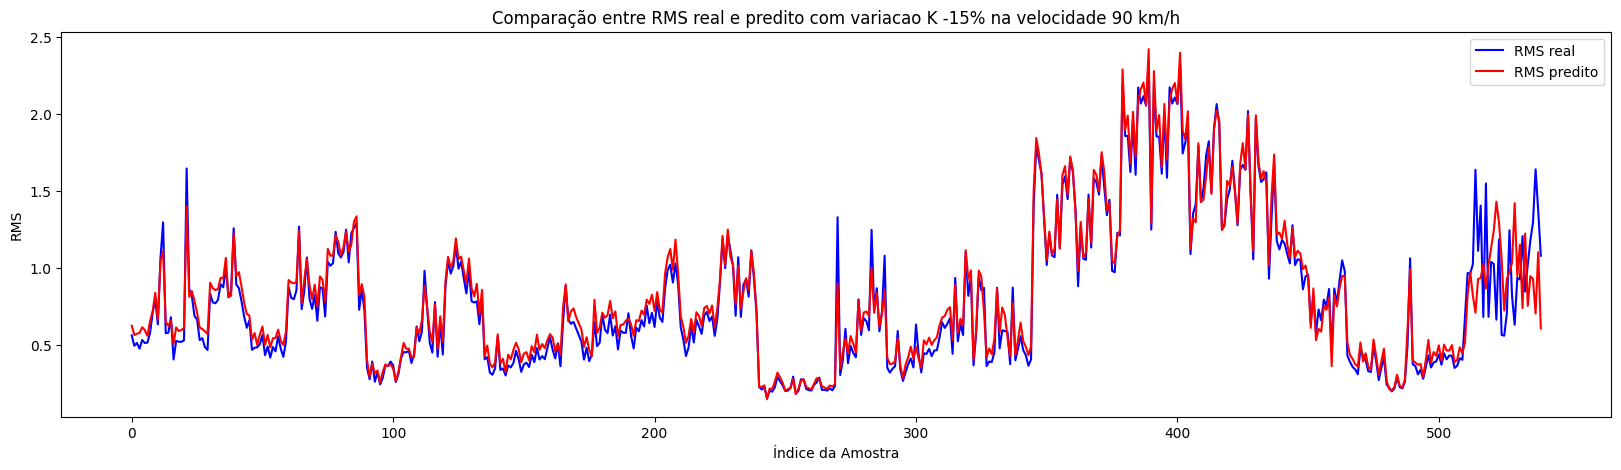

In [347]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[3240:3780], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_15[3240:3780], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 90 km/h')
plt.show()

##### K -15% 100 km/h

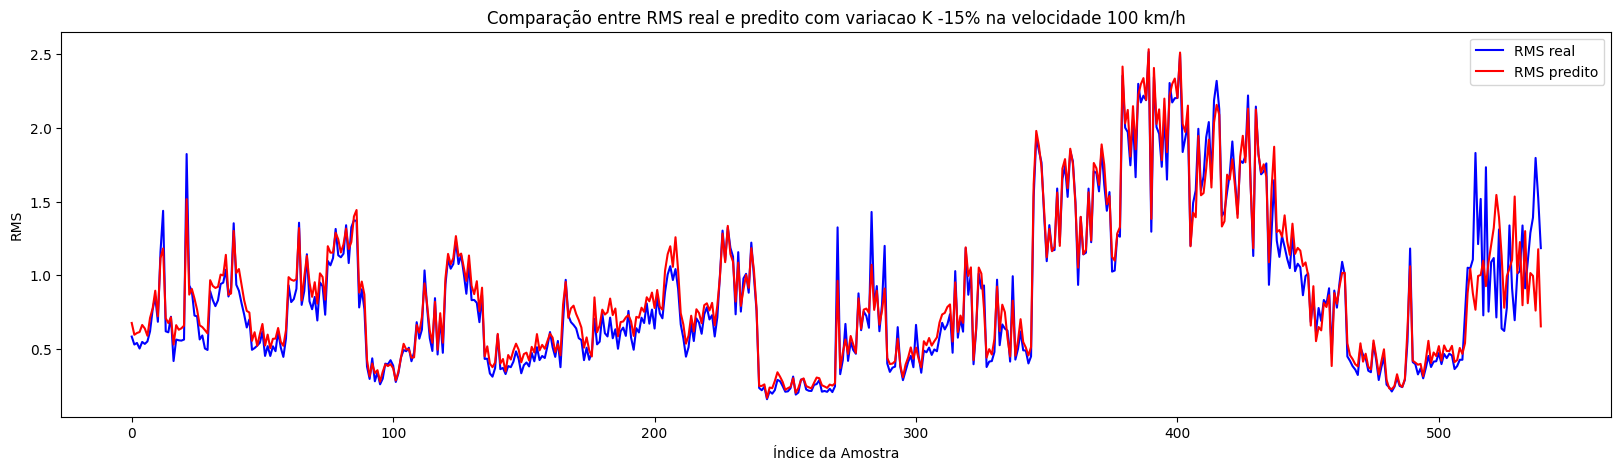

In [348]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[3780:4320], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_15[3780:4320], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 100 km/h')
plt.show()

##### K -15% 110 km/h

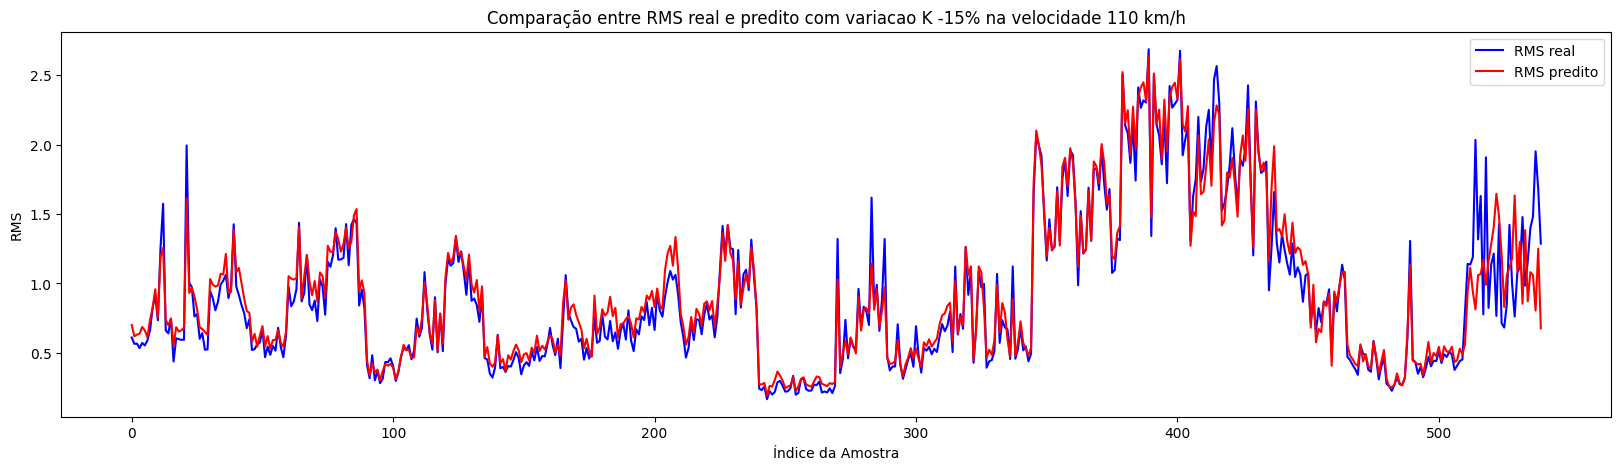

In [349]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[4320:4860], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_15[4320:4860], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 110 km/h')
plt.show()

##### K -15% 120 km/h

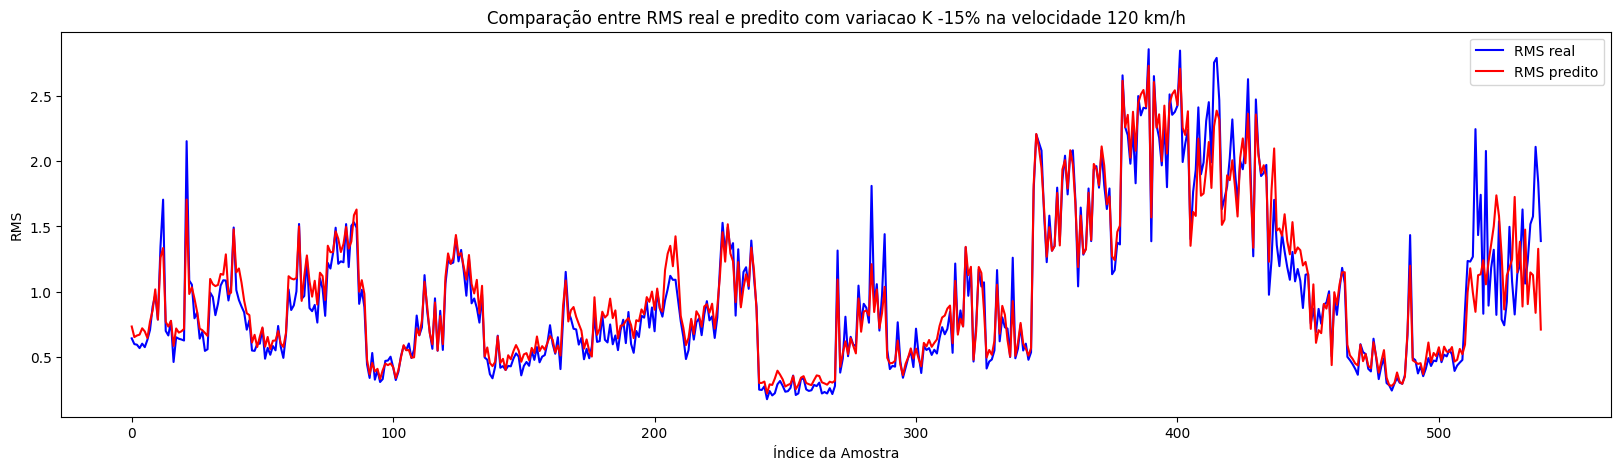

In [350]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[4860:5400], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_15[4860:5400], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 120 km/h')
plt.show()

#### K +5%

In [351]:
X_A_HB_k_mais_5 = df_A_HB_norm

In [352]:
X_A_HB_k_mais_5['k'] = 0.913

In [353]:
print(X_A_HB_k_mais_5)

           IRI    V      k      c     ms    mus    kus
0     0.175070  0.0  0.913  0.869  0.869  0.869  0.869
1     0.147721  0.0  0.913  0.869  0.869  0.869  0.869
2     0.151798  0.0  0.913  0.869  0.869  0.869  0.869
3     0.154031  0.0  0.913  0.869  0.869  0.869  0.869
4     0.170444  0.0  0.913  0.869  0.869  0.869  0.869
...        ...  ...    ...    ...    ...    ...    ...
5395  0.325042  1.0  0.913  0.869  0.869  0.869  0.869
5396  0.316123  1.0  0.913  0.869  0.869  0.869  0.869
5397  0.210425  1.0  0.913  0.869  0.869  0.869  0.869
5398  0.402940  1.0  0.913  0.869  0.869  0.869  0.869
5399  0.167129  1.0  0.913  0.869  0.869  0.869  0.869

[5400 rows x 7 columns]


In [354]:
y_pred_A_HB_k_mais_5 = modelo_A_HB.predict(X_A_HB_k_mais_5)

mse_A_HB_k_mais_5 = mean_squared_error(y_A_HB, y_pred_A_HB_k_mais_5)
r2_A_HB_k_mais_5 = r2_score(y_A_HB, y_pred_A_HB_k_mais_5)

print(f'Mean Squared Error (MSE): {mse_A_HB_k_mais_5:.3f}')
print(f'R^2 Score: {r2_A_HB_k_mais_5:.3f}')

169/169 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 0.017
R^2 Score: 0.922


##### K +5% 30 km/h

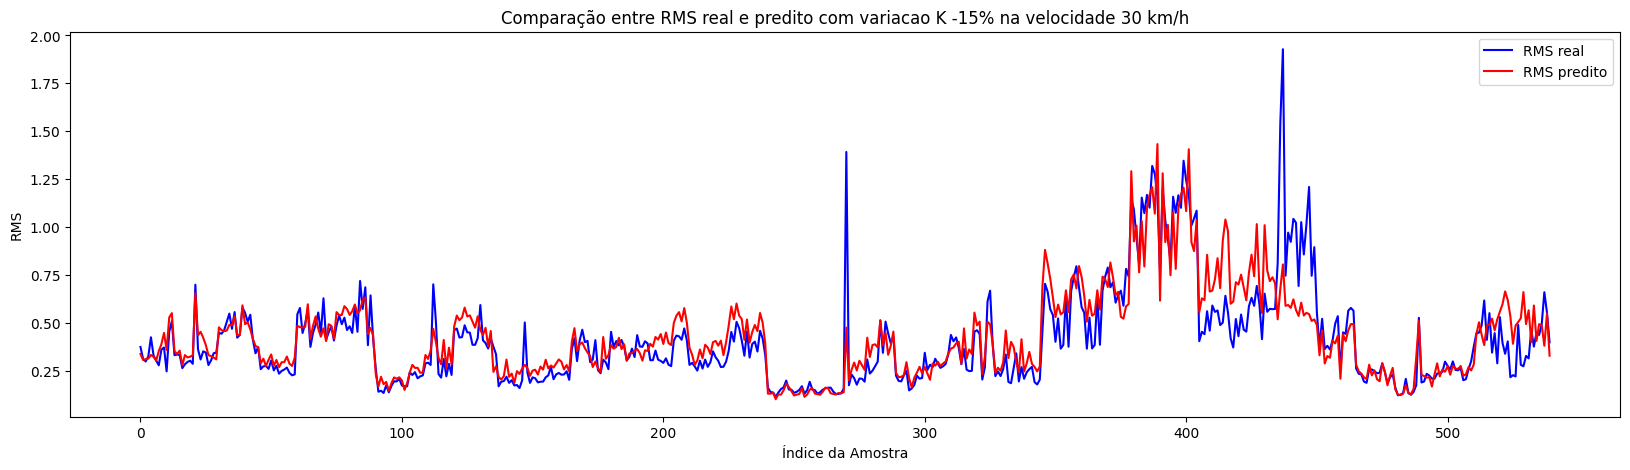

In [355]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[:540], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_mais_5[:540], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 30 km/h')
plt.show()

##### K +5% 40 km/h

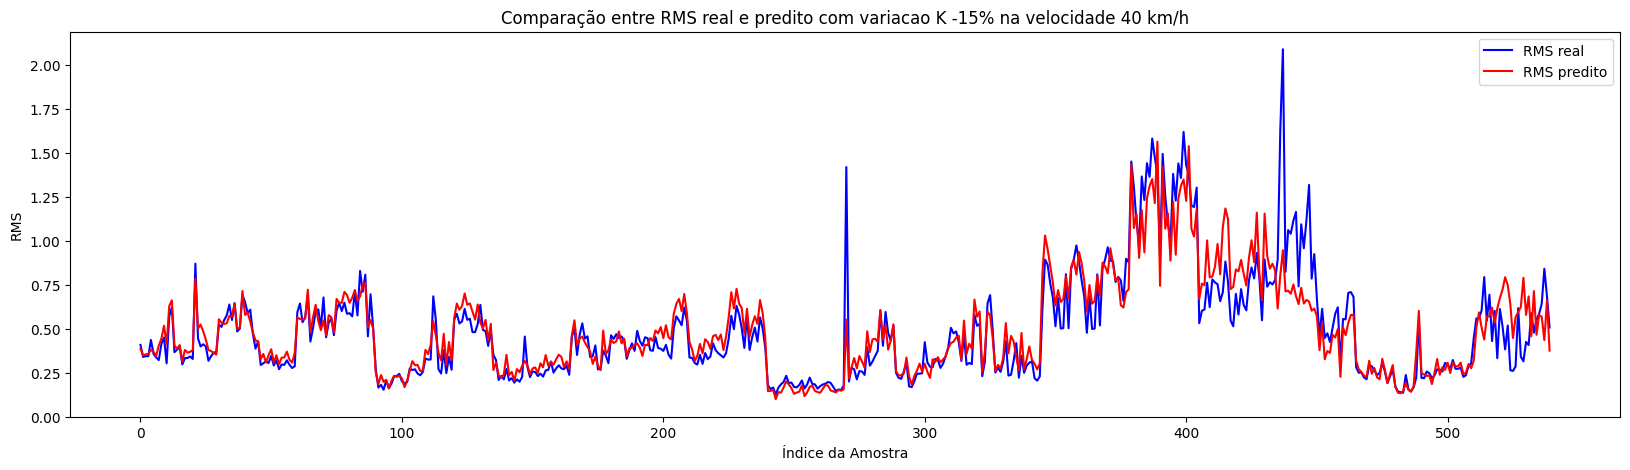

In [356]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[540:1080], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_mais_5[540:1080], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 40 km/h')
plt.show()

##### K +5% 50 km/h

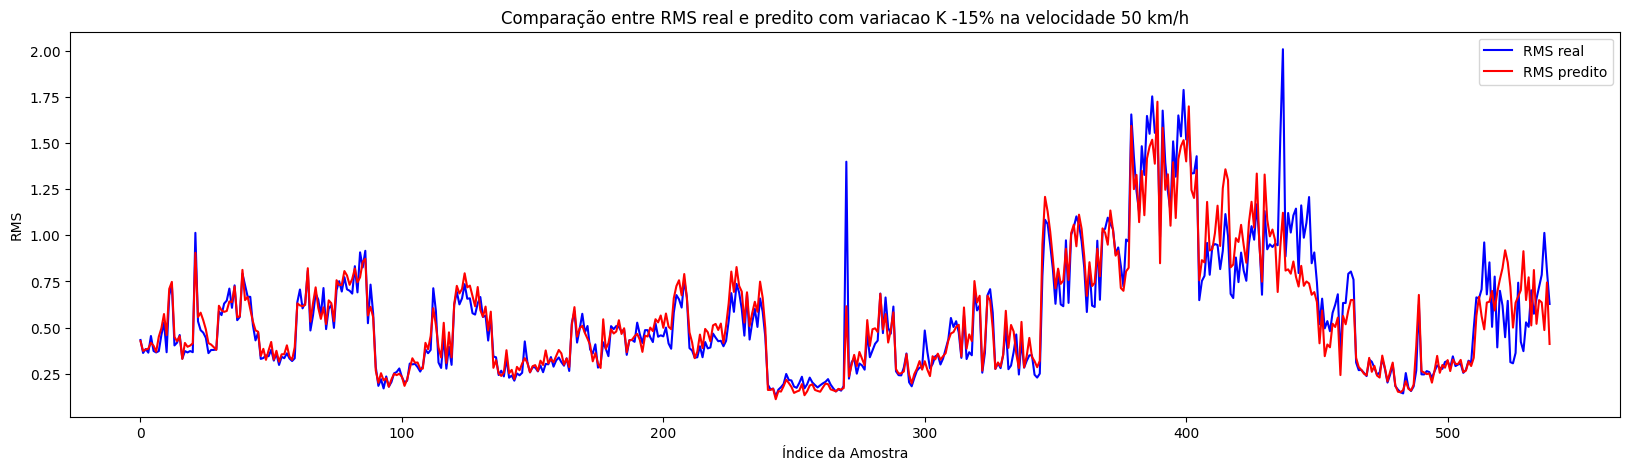

In [357]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[1080:1620], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_mais_5[1080:1620], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 50 km/h')
plt.show()

##### K +5% 60 km/h

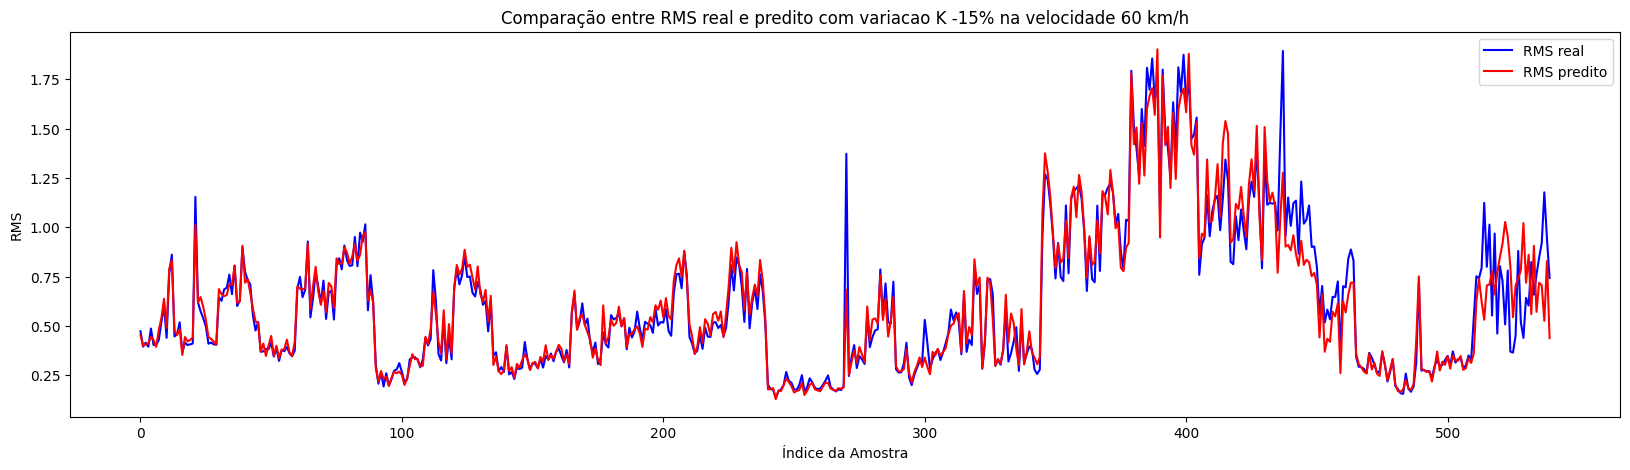

In [358]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[1620:2160], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_mais_5[1620:2160], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 60 km/h')
plt.show()

##### K +5% 70 km/h

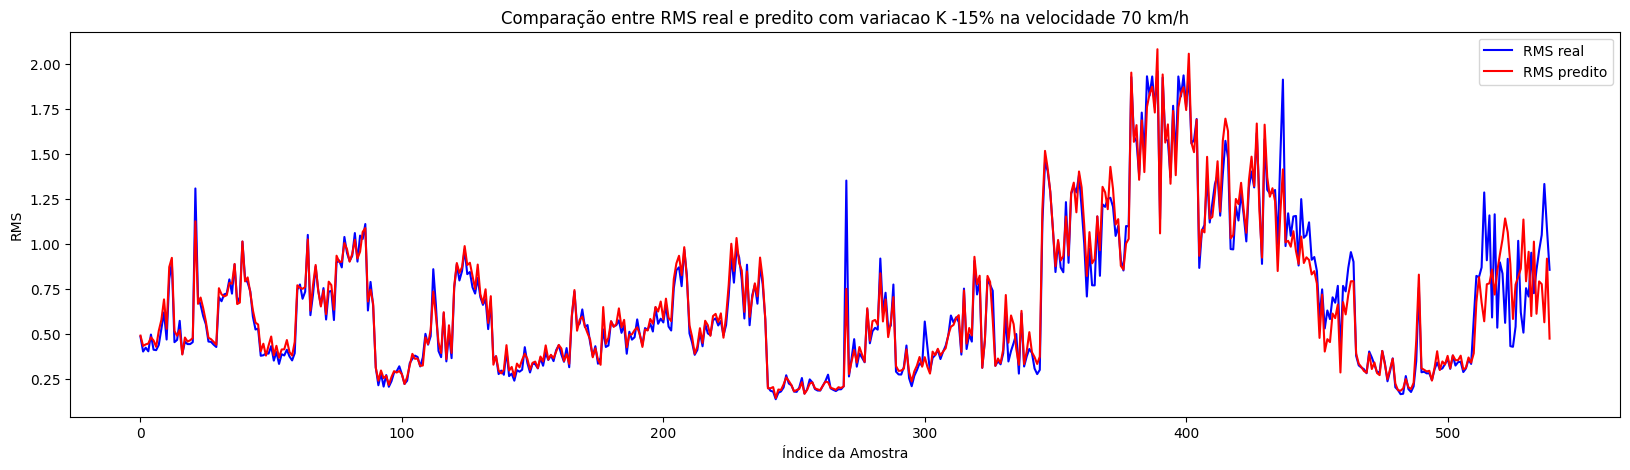

In [359]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[2160:2700], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_mais_5[2160:2700], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 70 km/h')
plt.show()

##### K +5% 80 km/h

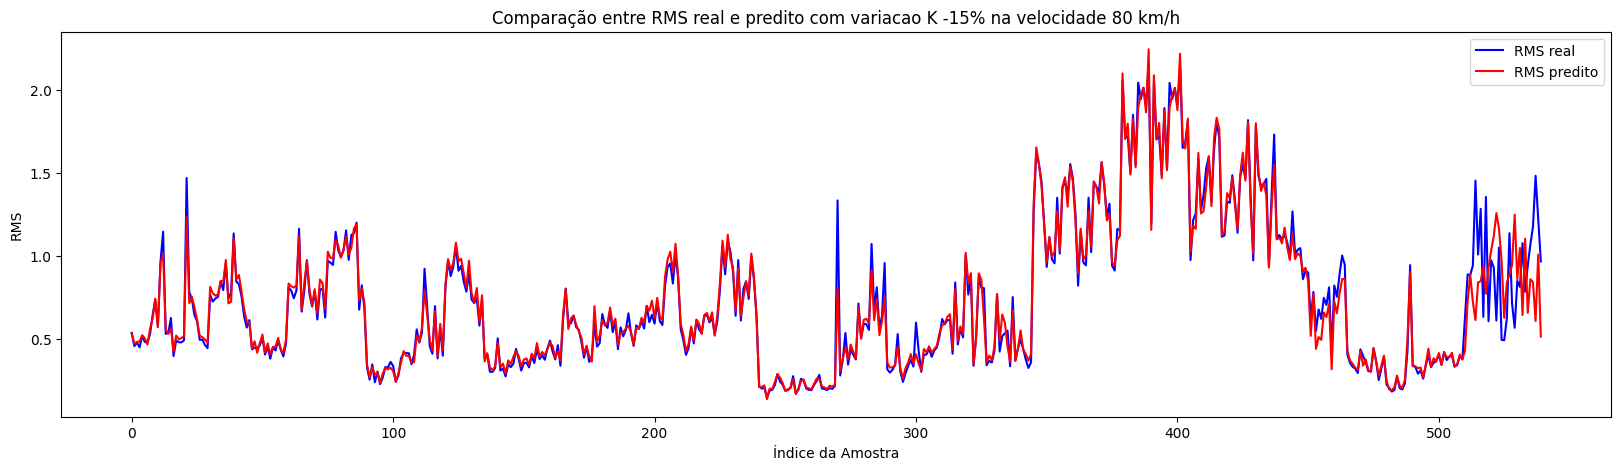

In [360]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[2700:3240], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_mais_5[2700:3240], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 80 km/h')
plt.show()

##### K +5% 90 km/h

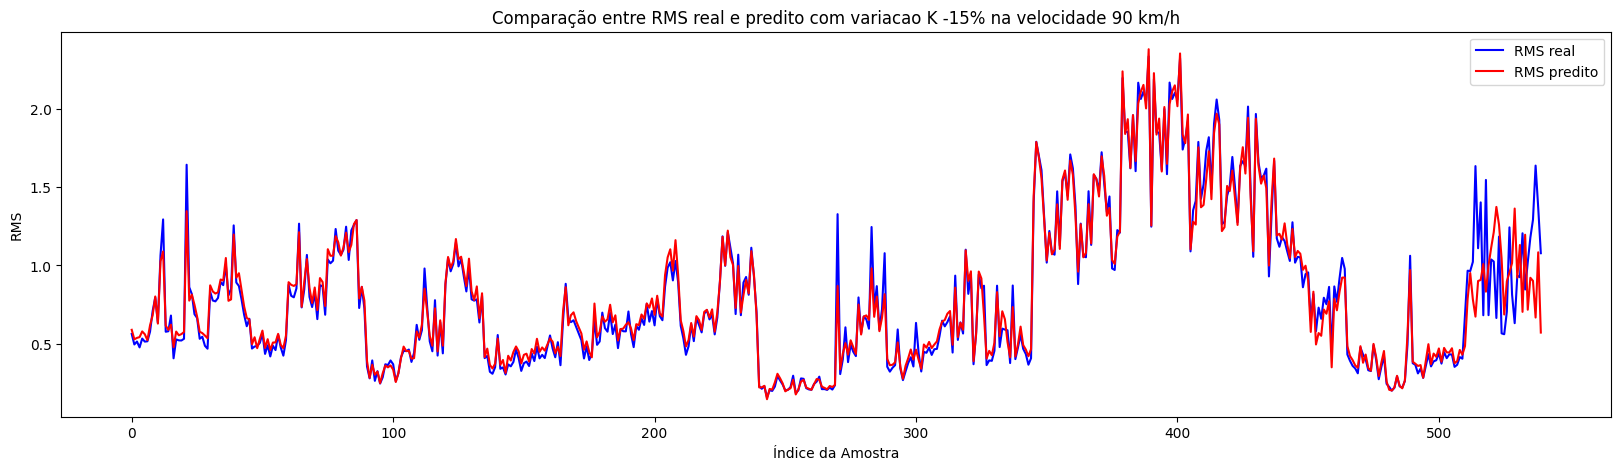

In [361]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[3240:3780], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_mais_5[3240:3780], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 90 km/h')
plt.show()

##### K +5% 100 km/h

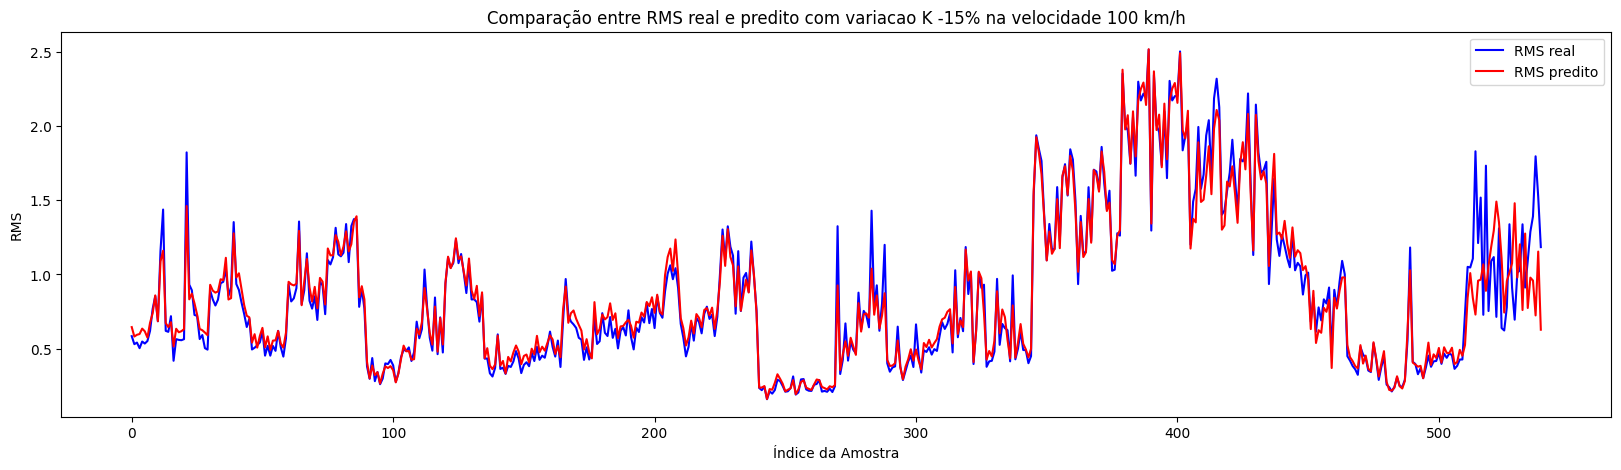

In [362]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[3780:4320], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_mais_5[3780:4320], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 100 km/h')
plt.show()

##### K +5% 110 km/h

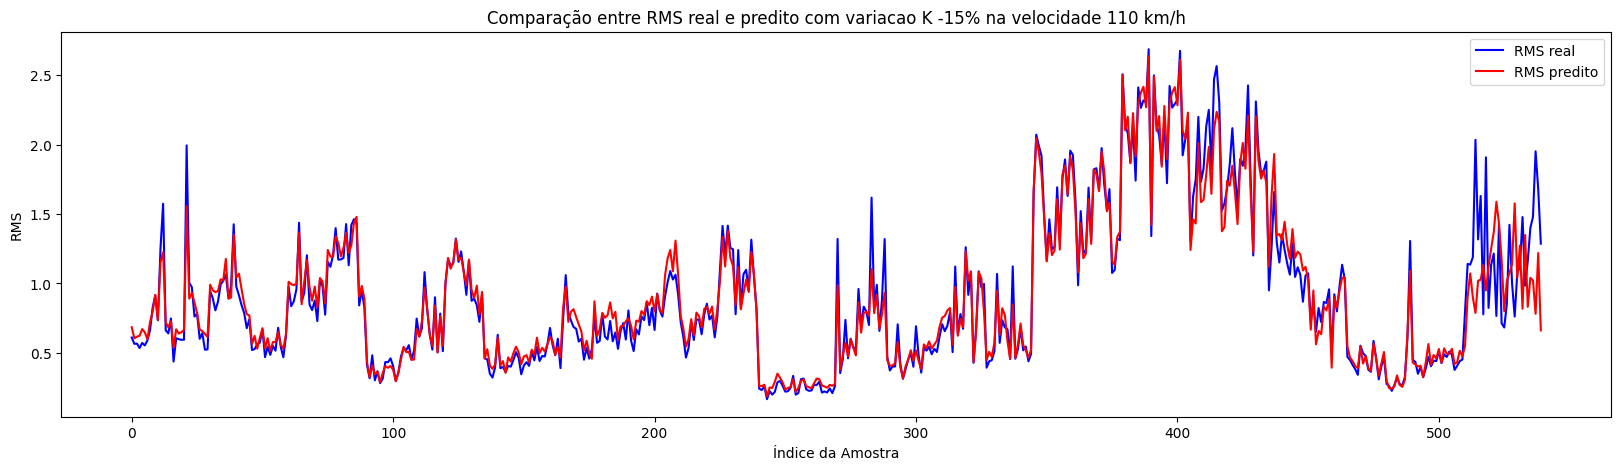

In [363]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[4320:4860], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_mais_5[4320:4860], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 110 km/h')
plt.show()

##### K +5% 120 km/h

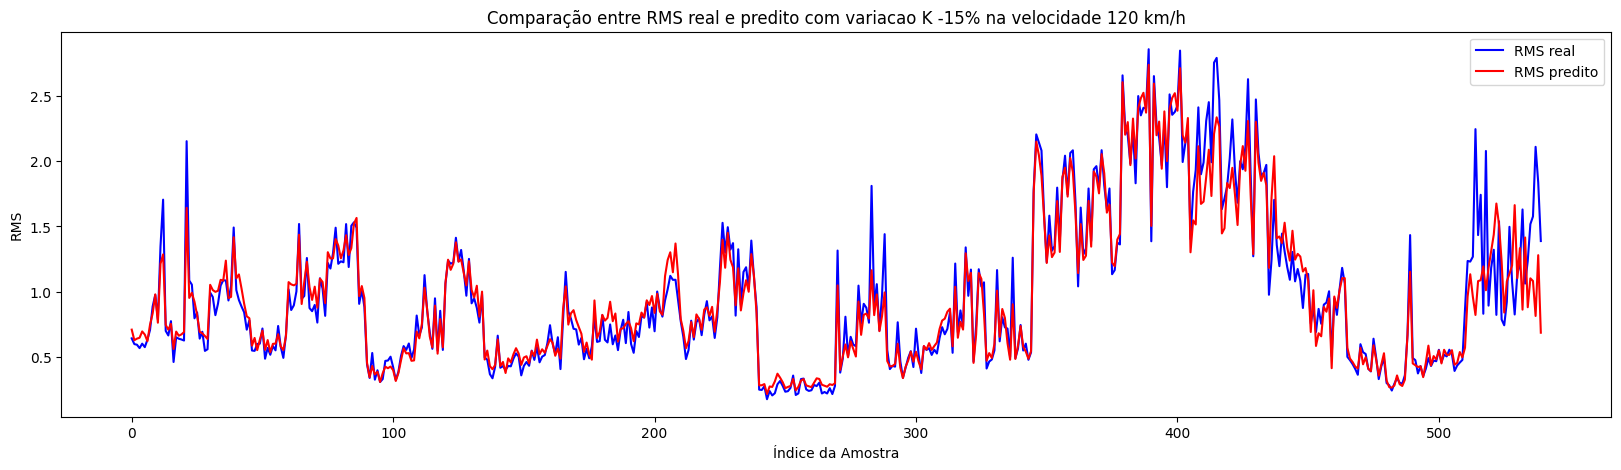

In [364]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[4860:5400], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_mais_5[4860:5400], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 120 km/h')
plt.show()

#### K +10%

In [365]:
X_A_HB_k_mais_10 = df_A_HB_norm

In [366]:
X_A_HB_k_mais_10['k'] = 0.957

In [367]:
print(X_A_HB_k_mais_10)

           IRI    V      k      c     ms    mus    kus
0     0.175070  0.0  0.957  0.869  0.869  0.869  0.869
1     0.147721  0.0  0.957  0.869  0.869  0.869  0.869
2     0.151798  0.0  0.957  0.869  0.869  0.869  0.869
3     0.154031  0.0  0.957  0.869  0.869  0.869  0.869
4     0.170444  0.0  0.957  0.869  0.869  0.869  0.869
...        ...  ...    ...    ...    ...    ...    ...
5395  0.325042  1.0  0.957  0.869  0.869  0.869  0.869
5396  0.316123  1.0  0.957  0.869  0.869  0.869  0.869
5397  0.210425  1.0  0.957  0.869  0.869  0.869  0.869
5398  0.402940  1.0  0.957  0.869  0.869  0.869  0.869
5399  0.167129  1.0  0.957  0.869  0.869  0.869  0.869

[5400 rows x 7 columns]


In [368]:
y_pred_A_HB_k_mais_10 = modelo_A_HB.predict(X_A_HB_k_mais_10)

mse_A_HB_k_mais_10 = mean_squared_error(y_A_HB, y_pred_A_HB_k_mais_10)
r2_A_HB_k_mais_10 = r2_score(y_A_HB, y_pred_A_HB_k_mais_10)

print(f'Mean Squared Error (MSE): {mse_A_HB_k_mais_10:.3f}')
print(f'R^2 Score: {r2_A_HB_k_mais_10:.3f}')

169/169 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 0.017
R^2 Score: 0.922


##### K +10% 30 km/h

##### K +10% 40 km/h

##### K +10% 50 km/h

##### K +10% 60 km/h

##### K +10% 70 km/h

##### K +10% 80 km/h

##### K +10% 90 km/h

##### K +10% 100 km/h

##### K +10% 110 km/h

##### K +10% 120 km/h

In [374]:
X_A_HB_k_teste = df_A_HB_norm

In [375]:
X_A_HB_k_teste['c'] = 1

In [376]:
print(X_A_HB_k_teste)

           IRI    V      k  c     ms    mus    kus
0     0.175070  0.0  0.957  1  0.869  0.869  0.869
1     0.147721  0.0  0.957  1  0.869  0.869  0.869
2     0.151798  0.0  0.957  1  0.869  0.869  0.869
3     0.154031  0.0  0.957  1  0.869  0.869  0.869
4     0.170444  0.0  0.957  1  0.869  0.869  0.869
...        ...  ...    ... ..    ...    ...    ...
5395  0.325042  1.0  0.957  1  0.869  0.869  0.869
5396  0.316123  1.0  0.957  1  0.869  0.869  0.869
5397  0.210425  1.0  0.957  1  0.869  0.869  0.869
5398  0.402940  1.0  0.957  1  0.869  0.869  0.869
5399  0.167129  1.0  0.957  1  0.869  0.869  0.869

[5400 rows x 7 columns]


In [378]:
y_pred_A_HB_k_mais_10 = modelo_A_HB.predict(X_A_HB_k_mais_10)

mse_A_HB_k_mais_10 = mean_squared_error(y_A_HB, y_pred_A_HB_k_mais_10)
r2_A_HB_k_mais_10 = r2_score(y_A_HB, y_pred_A_HB_k_mais_10)

print(f'Mean Squared Error (MSE): {mse_A_HB_k_mais_10:.3f}')
print(f'R^2 Score: {r2_A_HB_k_mais_10:.3f}')

169/169 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 0.017
R^2 Score: 0.921
